<div class="alert alert-block alert-info">Phase 2 Project Home Regression King's County Homesales

* Student name: **Daniel M. Smith**
* Student pace: **Full Time**
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:
<div>

## Stakeholder
<div class="alert alert-block alert-info"><div>
We are a small company looking for houses to purchase and remodel and either rent or sell in the Kings County, WA housing market. We will gather a list of target houses to inspect as potential investment properties.<div>




# Obtain data


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/kc_house_data.csv')

**Columns**<br>
id - unique identified for a house<br>
date - house was sold<br>
price - is prediction target<br>
bedrooms- of Bedrooms/House<br>
bathrooms- of bathrooms/bedrooms<br>
sqft_living - footage of the home<br>
sqft_lot - footage of the lot<br>
floors - Total floors (levels) in house<br>
waterfront - House which has a view to a waterfront<br>
view - Has been viewed<br>
condition - How good the condition is ( Overall )<br>
grade - overall grade given to the housing unit, based on King County grading system<br>
sqft_above - square footage of house apart from basement<br>
sqft_basement - square footage of the basement<br>
yr_built - Built Year<br>
yr_renovated - Year when house was renovated<br>
zipcode - zip<br>
lat - Latitude coordinate<br>
long - Longitude coordinate<br>
sqft_living15 - The avg square footage of interior housing living space for the nearest 15 neighbors<br>
sqft_lot15 - The avg square footage of the land lots of the nearest 15 neighbors<br>


In [3]:
data.shape

(21597, 21)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


--- 
--- 
--- 

# Scrub

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
data['waterfront'].sort_values(ascending=False)

14760    1.0
11103    1.0
1166     1.0
17753    1.0
300      1.0
        ... 
21578    NaN
21582    NaN
21586    NaN
21587    NaN
21595    NaN
Name: waterfront, Length: 21597, dtype: float64

In [7]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [8]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [9]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Observations:


<div class="alert alert-block alert-info">
    Observations:
11% of waterfront is NaN<br>
18% of yr_renovated is NaN<br>
.2% of view is NaN<br>
We will set Nan to 0.0 for Nans<div>

**Handling Nan Values**

In [10]:
data['waterfront'] = data['waterfront'].fillna(0.0)

In [11]:
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)

In [12]:
data['view'] = data['view'].fillna(0.0)

**Rename date column to date last sold**

In [13]:

data['month'] = pd.to_datetime(data['date']).dt.month
data.drop(columns=['date'], inplace=True, axis = 1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [15]:
#Covers 70 zipcodes
data.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Observations:sqft_basement should be converted to a float64 not an object
also has ? which should be set to 0.0


In [16]:
#replacing '?'
data['sqft_basement'] = [0.0 if value == '?' else value for value in data['sqft_basement']]

In [17]:
data.loc[data["sqft_basement"] == '?']


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month


In [18]:
data["sqft_basement"] = pd.to_numeric(data["sqft_basement"])

Price column seems to be the price since last sold. This could be an oout of date column if it has been a long while since last sole.  We should make a 2 features, 1. age of home and 2. how many years since last sold.


Sqft_living15 seems to be an average of the 15 properties around
sqft_lot15 seems to be average of 15 lots around

In [19]:
data.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1
21596,1523300157,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,...,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357,10


In [20]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,...,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,...,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


#### Observations

<div class="alert alert-block alert-info">The data is about houses in zipcodes around Seattle, WA.  
The dependent or response variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000. <br>
sq_ft living ranges from 370 to 13540 sf ft.  <br>
bedrooms range from 1 to 33 with a mean of 3.37 and median of 3. <br>
sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.<br>
    <div>

**categorical data**


<div class="alert alert-block alert-info">
zipcode-70 zipcodes<br>
grade-grade from kings county grading system 3-13<br>
condition-1 to 5 5 is best<br>
view- has been viewed 0-4<br>
waterfront- view of waterfront 0-1 being yes<br><div>


In [21]:
data['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
data['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [23]:
data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [25]:
data['age'] = 2015 - data['yr_built']

In [26]:
data['age']

0        60
1        64
2        82
3        50
4        28
         ..
21592     6
21593     1
21594     6
21595    11
21596     7
Name: age, Length: 21597, dtype: int64

In [27]:
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,60
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,64
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,50
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,28
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,5,14
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,6,20
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,1,52
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,4,55
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,3,12


In [28]:
data['yrsince_reno'] = data['age']

In [29]:
data['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in data['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
data['yrsince_reno'] = data['yrsince_reno'].fillna(data['age'])

In [30]:
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,yrsince_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,60,60.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,64,24.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,82,82.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,50,50.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,28,28.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,2001,0.0,98053,47.6561,-122.005,4760,101930,5,14,14.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,1995,0.0,98003,47.3097,-122.327,2238,6819,6,20,20.0
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,1963,0.0,98198,47.4095,-122.315,1650,9711,1,52,52.0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,1960,0.0,98146,47.5123,-122.337,1780,8113,4,55,55.0
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,2003,0.0,98038,47.3684,-122.031,2390,7570,3,12,12.0


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,6.760198e-03,8.194394e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.331805e-01,7.646726e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [33]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'age', 'yrsince_reno'],
      dtype='object')

In [34]:
#rearrange Columns
data = data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'yr_built','age','condition', 'grade', 'waterfront',
        'yr_renovated','yrsince_reno', 'sqft_above', 'sqft_basement',  'view',  'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15' ]]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   yr_built       21597 non-null  int64  
 8   age            21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  waterfront     21597 non-null  float64
 12  yr_renovated   21597 non-null  float64
 13  yrsince_reno   21597 non-null  float64
 14  sqft_above     21597 non-null  int64  
 15  sqft_basement  21597 non-null  float64
 16  view           21597 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [36]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,age,condition,...,yr_renovated,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955,60,3,...,0.0,60.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,64,3,...,1991.0,24.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,82,3,...,0.0,82.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,50,5,...,0.0,50.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,28,3,...,0.0,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,2009,6,3,...,0.0,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2014,1,3,...,0.0,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,2009,6,3,...,0.0,6.0,1020,0.0,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,2004,11,3,...,0.0,11.0,1600,0.0,0.0,98027,47.5345,-122.069,1410,1287


In [37]:
data.to_csv('./data/kc_house_data_tidy.csv',encoding='utf-8')

#### Summary

<div class="alert alert-block alert-info">  <div>

---
---
---

# EDA of data

In [38]:
#load Tidy Data
hddf = pd.read_csv('./data/kc_house_data_tidy.csv')

In [39]:
hddf.drop(columns='Unnamed: 0',inplace=True)

In [40]:
hddf.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [41]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns


In [42]:
for col in hddf:
    print(col.upper())
    print(hddf[col].value_counts())
    print('################')

ID
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
################
PRICE
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
################
BEDROOMS
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
################
BATHROOMS
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75 

<AxesSubplot:xlabel='long', ylabel='lat'>

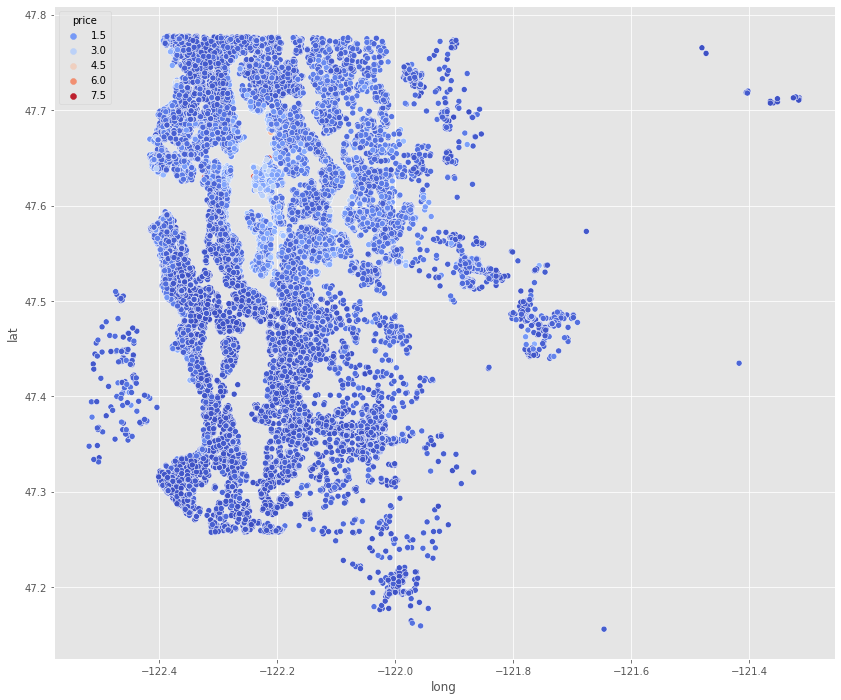

In [43]:
plt.figure(figsize=(14,12))
sns.scatterplot(x='long', y='lat', data=hddf, hue='price', palette='coolwarm')

In [44]:
hddf.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'age', 'condition', 'grade', 'waterfront', 'yrsince_reno',
       'sqft_above', 'sqft_basement', 'view', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [45]:
#define feature pertinent to model
feats_df = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'age', 'condition', 'grade', 'waterfront', 'yrsince_reno',
       'sqft_above', 'sqft_basement', 'view', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

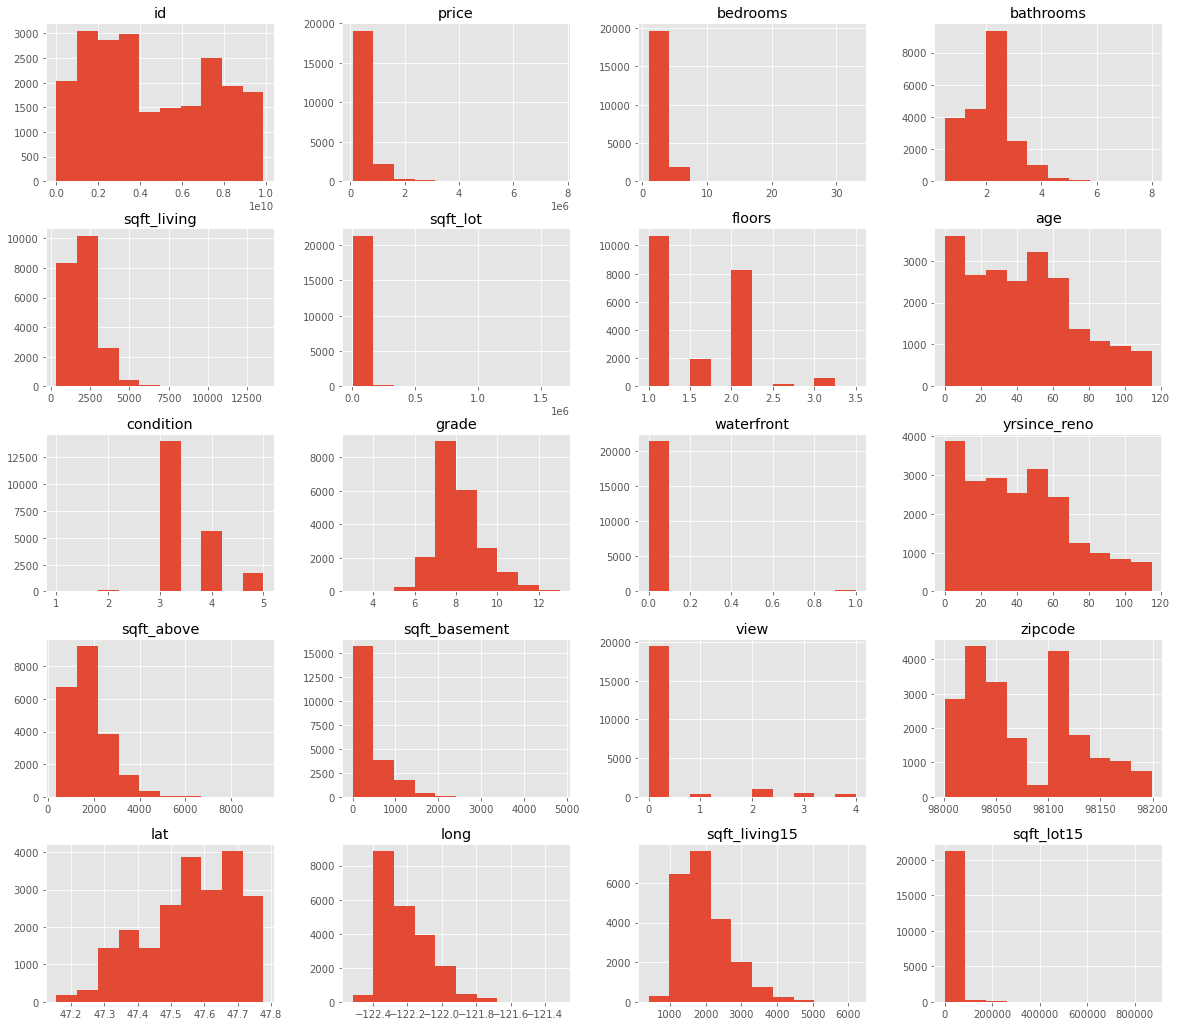

In [46]:
hddf.hist(figsize = (20,18));

Price looks to be right skewed.  We will look for linearity between different pairs of data.
## Check for Linearity

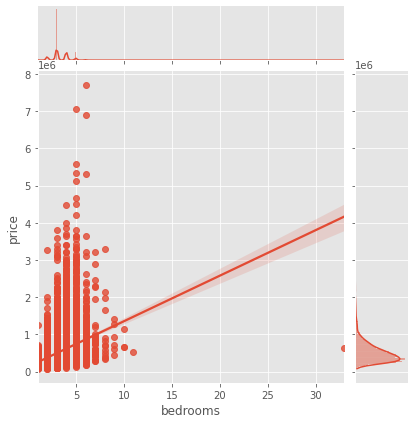

In [47]:
sns.jointplot(x='bedrooms',y='price', data=hddf, kind='reg');

**Observation:** A Big outlier of 30+ bedrooms. Note: we should remove the outlier. 

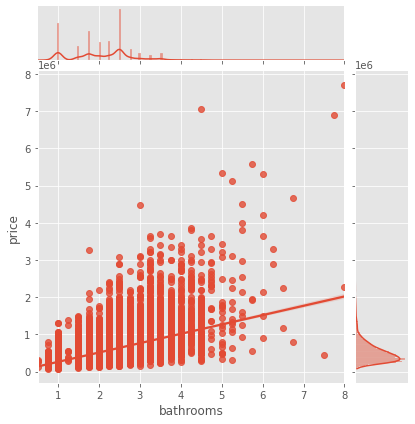

In [48]:
sns.jointplot(x='bathrooms',y='price', data=hddf, kind='reg');

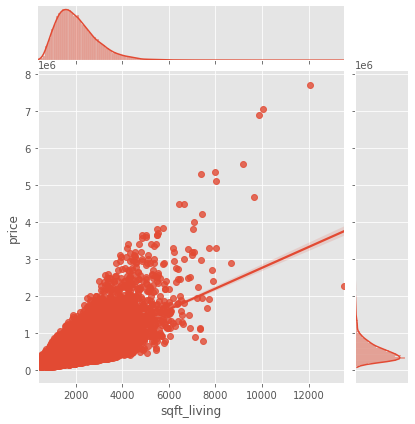

In [49]:
sns.jointplot(x='sqft_living',y='price', data=hddf, kind='reg');

Is linear? not truly but somewhat

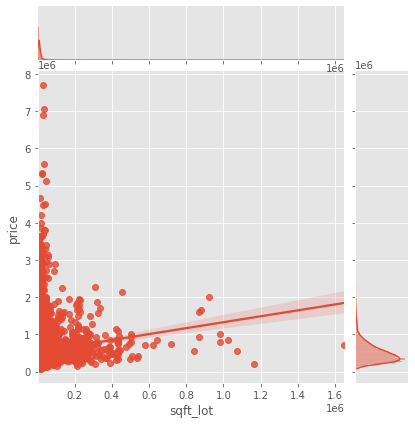

In [50]:
sns.jointplot(x='sqft_lot',y='price', data=hddf, kind='reg');

not linear

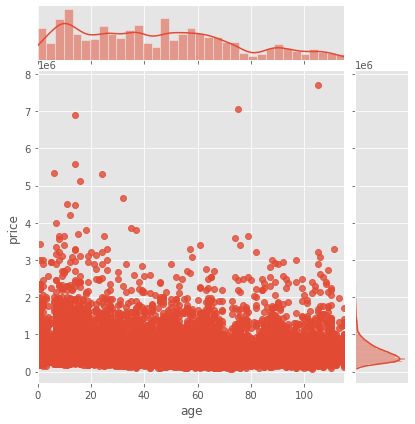

In [51]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

not linear

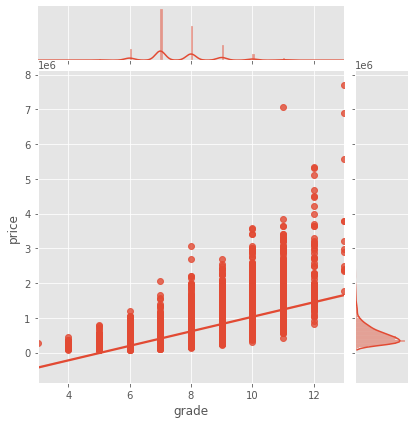

In [52]:
sns.jointplot(x='grade',y='price', data=hddf, kind='reg');

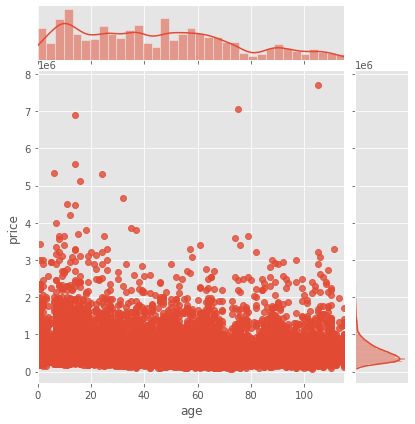

In [53]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

## Check for multicolinearity in features

In [54]:
corr = hddf[feats_df].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,waterfront,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.155670,0.026496,0.356563,-0.002127,-0.164392,0.479386,0.297229,0.078354,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,-0.507173,-0.126479,0.665838,0.063629,-0.532389,0.686668,0.278485,0.186016,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,-0.318152,-0.059445,0.762779,0.104637,-0.339146,0.876448,0.428660,0.281715,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.052946,-0.008830,0.114731,0.021459,-0.051870,0.184139,0.015031,0.075054,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.489193,-0.264075,0.458794,0.020797,-0.500721,0.523989,-0.241866,0.028414,-0.059541,0.049239,0.125943,0.280102,-0.010722
age,-0.155670,-0.507173,-0.318152,-0.052946,-0.489193,1.000000,0.361592,-0.447865,0.024487,0.926406,-0.424037,0.130085,0.054452,0.347210,0.148370,-0.409993,-0.326377,-0.070777
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.361592,1.000000,-0.146896,0.016648,0.390264,-0.158904,0.168482,0.045622,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.356563,0.665838,0.762779,0.114731,0.458794,-0.447865,-0.146896,1.000000,0.082818,-0.459334,0.756073,0.165843,0.249082,-0.185771,0.113575,0.200341,0.713867,0.120981
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,0.024487,0.016648,0.082818,1.000000,0.006891,0.071778,0.083050,0.380543,0.028923,-0.012157,-0.037628,0.083823,0.030658
yrsince_reno,-0.164392,-0.532389,-0.339146,-0.051870,-0.500721,0.926406,0.390264,-0.459334,0.006891,1.000000,-0.433434,0.105181,0.026631,0.323968,0.137445,-0.386314,-0.325529,-0.069415


In [55]:
#looking for pairwise correlations over .65 is a sign of multicolinearity

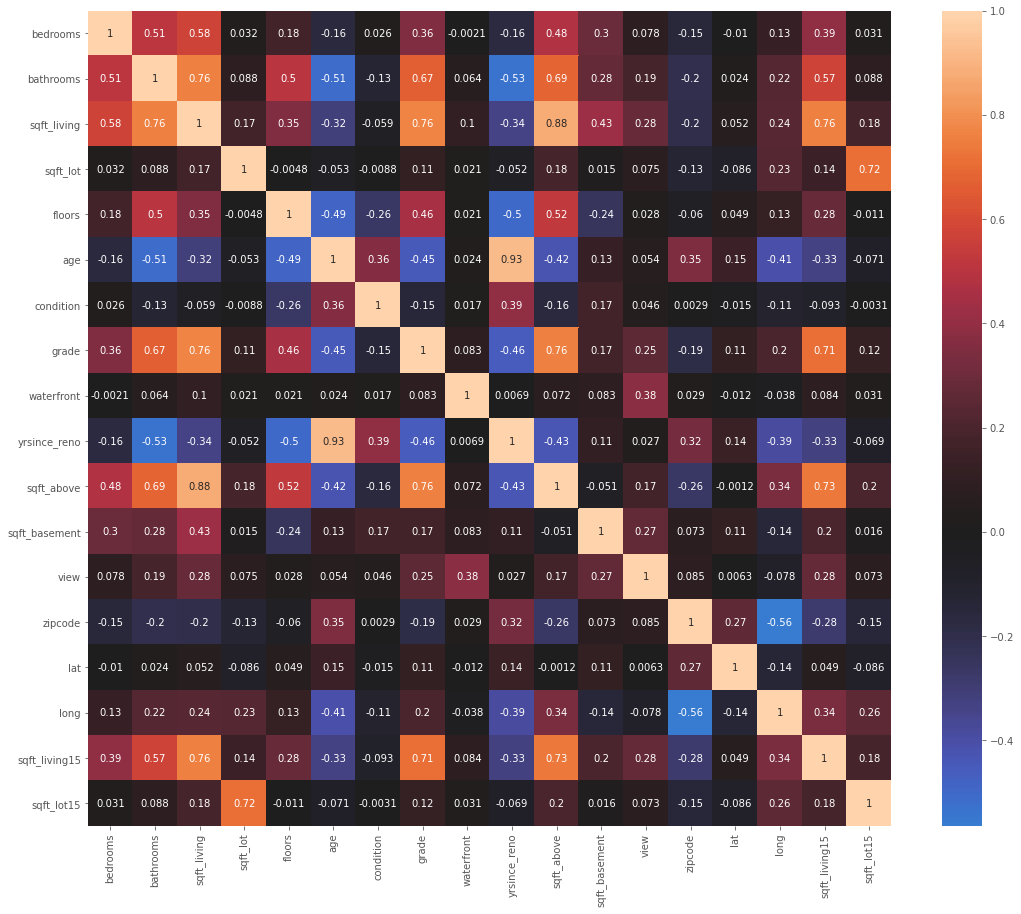

In [56]:
plt.figure(figsize=(18,15))
sns.heatmap(corr, center=0, annot=True);

--- 
--- 
--- 

# Model Building 
## Baseline model

In [57]:
hddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   age            21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  waterfront     21597 non-null  float64
 11  yrsince_reno   21597 non-null  float64
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  view           21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [58]:
from statsmodels.formula.api import ols

In [59]:
outcome = 'price'
predictors_df = hddf.drop(['id', 'price', ], axis = 1)
predictor_variables = "+".join(predictors_df.columns)
formula = outcome + '~' + predictor_variables

In [60]:
predictor_variables

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+age+condition+grade+waterfront+yrsince_reno+sqft_above+sqft_basement+view+zipcode+lat+long+sqft_living15+sqft_lot15'

In [61]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+age+condition+grade+waterfront+yrsince_reno+sqft_above+sqft_basement+view+zipcode+lat+long+sqft_living15+sqft_lot15'

In [62]:
baseline_model = ols(formula = formula, data = hddf).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:53:13   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.329e+06   2.88e+06      0.461      0.645   -4.33e+06    6.98e+06
bedrooms      -3.592e+04   1901.055    -18.897      0.000   -3.97e+04   -3.22e+04
bathrooms      4.167e+04   3269.532     12.744      0.000    3.53e+04    4.81e+04
sqft_living     102.6395     18.081      5.677      0.000      67.200     138.079
sqft_lot          0.1287      0.048      2.684      0.007       0.035       0.223
floors         6726.8993   3605.553      1.866      0.062    -340.250    1.38e+04
age            3312.9565    127.530     25.978      0.000    3062.987    3562.926
condition      2.678e+04   2353.707     11.380      0.000    2.22e+04    3.14e+04
grade          9.676e+04   2162.791     44.738      0.000    9.25e+04    1.01e+05
waterfront      6.21e+05   1.81e+04     34.256      0.000    5.85e+05    6.56e+05
yrsince_reno   -676.0185    131.088     -5.157      0.000    -932.962    -419.075
sqft_above       78.4711     18.072      4.342      0.000      43.048     113.894
sqft_basement    47.7765     17.911      2.667      0.008      12.670      82.883
view           5.345e+04   2122.012     25.188      0.000    4.93e+04    5.76e+04
zipcode        -584.6090     32.998    -17.716      0.000    -649.288    -519.930
lat            6.008e+05   1.07e+04     55.922      0.000     5.8e+05    6.22e+05
long          -2.179e+05   1.32e+04    -16.553      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.5861      3.453      6.252      0.000      14.818      28.354
sqft_lot15       -0.3869      0.073     -5.273      0.000      -0.531      -0.243
==============================================================================
Omnibus:                    18331.569   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1823772.872
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      47.452   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusions from baseline model:

1. Drop **id** as its not a relevant feature (even though it has a good p-value doesn't really tell us anything)
2. **Bedrooms** has a negative coefficient -> As bedrooms increase, price decreases. 
3. Price per sqft is about $102
4. **Yr_Built** has a negative coefficient
5. **Zipcode** has a negative coefficent. need to look into how to get location data in the model
6. **sqft_lot15** has a neg coef  
7. **yrsince_reno**
8. **floors** .062 not relevant

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [64]:
X = predictors_df
y = hddf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [65]:
baseline_linreg = LinearRegression()
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [66]:
y_pred = baseline_linreg.predict(X_test)

In [67]:
residuals = y_pred - y_test

In [68]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'age',
       'condition', 'grade', 'waterfront', 'yrsince_reno', 'sqft_above',
       'sqft_basement', 'view', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [69]:
baseline_linreg.coef_

array([-3.89688786e+04,  4.15896223e+04,  1.24070917e+02,  1.69028472e-01,
        1.08304695e+04,  3.23425813e+03,  2.51784144e+04,  9.82927953e+04,
        6.01867568e+05, -5.70846507e+02,  5.19520944e+01,  2.98032950e+01,
        5.42902143e+04, -5.93251557e+02,  5.98034512e+05, -2.08357883e+05,
        2.43185044e+01, -4.40182678e-01])

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 199867.60910058717
Test RMSE: 205457.75418752249


In [72]:
import statsmodels.api as sm
import scipy.stats as stats

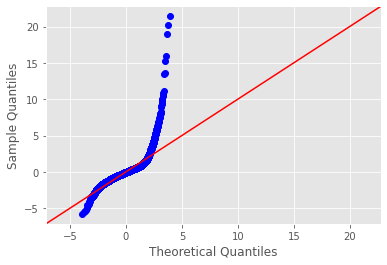

In [73]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

## Model 2 -  Dealing with outliers

In [74]:
hddf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
age,21597.0,4.400032e+01,2.937523e+01,0.000000e+00,1.800000e+01,4.000000e+01,6.400000e+01,1.150000e+02
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


#### hddf_no_out

In [75]:
#removed 75 rows based off bathroom outliers
len(hddf[hddf.bathrooms >= 1])

21522

In [76]:
hddf_no_out = hddf[hddf.bathrooms >= 1]

In [77]:
#Clean outliers where z score is > 3
#not cleaning zscore outliers where negative as smaller is good.
hddf_no_out.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'age', 'condition', 'grade', 'waterfront', 'yrsince_reno',
       'sqft_above', 'sqft_basement', 'view', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [78]:
z = stats.zscore(hddf_no_out)
print(z)

[[ 0.88519717 -0.86846203 -0.4100402  ... -0.30658272 -0.94639815
  -0.26006107]
 [ 0.63667269 -0.00860214 -0.4100402  ... -0.74828667 -0.43556223
  -0.18715978]
 [ 0.36472761 -0.98243903 -1.49404526 ... -0.13560055  1.0677549
  -0.17165589]
 ...
 [-1.50076899 -0.49280037 -0.4100402  ... -0.94064161 -0.66908723
  -0.41183796]
 [ 0.70129178 -0.38399178  0.67396486 ... -1.05462973 -0.23122787
  -0.20325011]
 [-1.49093154 -0.38399178 -0.4100402  ...  1.03277764 -0.84423097
  -0.41997476]]


In [79]:
threshold = 3.0
print(np.where(z > threshold))

(array([    5,     5,     5, ..., 21501, 21501, 21511], dtype=int64), array([ 3,  4, 18, ..., 13, 18, 12], dtype=int64))


In [80]:
hddf_no_out = hddf_no_out[(z < 3).all(axis=1)]

In [81]:
len(hddf_no_out)

19414

In [82]:
1000/22000

0.045454545454545456

Removed .4.5% of values with z score > 3

In [83]:
hddf_no_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19414.0,4.639691e+09,2.866897e+09,1.000102e+06,2.202500e+09,4.003000e+09,7.345528e+09,9.900000e+09
price,19414.0,4.855176e+05,2.355341e+05,7.800000e+04,3.149500e+05,4.350000e+05,6.011130e+05,1.640000e+06
bedrooms,19414.0,3.326362e+00,8.507958e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
bathrooms,19414.0,2.043989e+00,6.890579e-01,1.000000e+00,1.500000e+00,2.000000e+00,2.500000e+00,4.250000e+00
sqft_living,19414.0,1.954245e+03,7.392536e+02,3.900000e+02,1.400000e+03,1.840000e+03,2.413750e+03,4.750000e+03
sqft_lot,19414.0,9.838963e+03,1.148257e+04,5.200000e+02,5.000000e+03,7.350000e+03,9.898000e+03,1.372140e+05
floors,19414.0,1.481482e+00,5.384602e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
age,19414.0,4.443000e+01,2.946139e+01,0.000000e+00,1.900000e+01,4.100000e+01,6.400000e+01,1.150000e+02
condition,19414.0,3.411456e+00,6.494966e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,19414.0,7.533378e+00,1.026960e+00,4.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.100000e+01


In [84]:
hddf_no_out

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,waterfront,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,60,3,7,0.0,60.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,64,3,7,0.0,24.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,82,3,6,0.0,82.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,50,5,7,0.0,50.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,8,0.0,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,1010000.0,4,3.50,3510,7200,2.0,6,3,9,0.0,6.0,2600,910.0,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,7,3,8,0.0,7.0,1180,130.0,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,6,3,8,0.0,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,1,3,8,0.0,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200


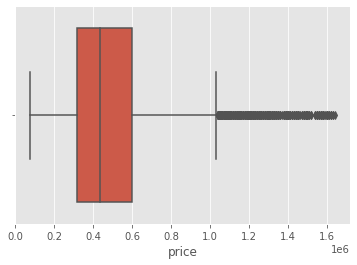

In [85]:
sns.boxplot(x=hddf_no_out.price);

## Model 2


In [86]:
hddf_no_out.shape

(19414, 20)

In [87]:
outcome = 'price'
predictors = hddf_no_out.drop(columns = ['price', 'id'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [88]:
model_2 = ols(formula = formula, data = hddf_no_out).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2418.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:53:27   Log-Likelihood:            -2.5665e+05
No. Observations:               19414   AIC:                         5.133e+05
Df Residuals:                   19396   BIC:                         5.135e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.481e+06   2.04e+06     -2.686      0.007   -9.48e+06   -1.48e+06
bedrooms      -1.502e+04   1471.474    -10.210      0.000   -1.79e+04   -1.21e+04
bathrooms      2.933e+04   2435.132     12.044      0.000    2.46e+04    3.41e+04
sqft_living      80.4875     13.879      5.799      0.000      53.284     107.691
sqft_lot          0.2857      0.145      1.972      0.049       0.002       0.570
floors         2.849e+04   2619.453     10.875      0.000    2.34e+04    3.36e+04
age            2767.6561     93.271     29.673      0.000    2584.836    2950.476
condition      2.762e+04   1650.088     16.738      0.000    2.44e+04    3.09e+04
grade          8.601e+04   1575.778     54.581      0.000    8.29e+04    8.91e+04
waterfront     1.274e-06   4.74e-07      2.686      0.007    3.44e-07     2.2e-06
yrsince_reno   -592.2153     95.526     -6.200      0.000    -779.454    -404.977
sqft_above       17.7745     13.852      1.283      0.199      -9.377      44.926
sqft_basement    13.1119     13.748      0.954      0.340     -13.835      40.058
view            4.03e+04   2445.244     16.480      0.000    3.55e+04    4.51e+04
zipcode        -358.4750     23.348    -15.354      0.000    -404.238    -312.712
lat            5.692e+05   7468.260     76.221      0.000    5.55e+05    5.84e+05
long          -1.054e+05   1.05e+04    -10.071      0.000   -1.26e+05   -8.49e+04
sqft_living15    46.0971      2.721     16.943      0.000      40.764      51.430
sqft_lot15       -1.3384      0.188     -7.116      0.000      -1.707      -0.970
==============================================================================
Omnibus:                     5219.322   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23220.927
Skew:                           1.251   Prob(JB):                         0.00
Kurtosis:                       7.738   Cond. No.                     8.21e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusions from model 2:

1. Sqft_Basement no longer relevant feature. Will need to drop it in the next model
2. sqft_lot no longer relevant feature. Will need to drop it in the next model

In [89]:
X = hddf_no_out.drop("price", axis = 1)
y = hddf_no_out['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [90]:
print(len(X_train))

print(len(X_test))

14560
4854


In [91]:
model2_linreg = LinearRegression()
model2_linreg.fit(X_train, y_train)
y_pred = model2_linreg.predict(X_test)
residuals = y_pred - y_test

In [92]:
model2_linreg.coef_

array([-6.89271342e-07, -1.74498048e+04,  3.02656086e+04,  7.93955619e+01,
        1.76508732e-01,  2.91479422e+04,  2.89442033e+03,  2.75479680e+04,
        8.41020068e+04, -1.07320375e-10, -7.04903888e+02,  2.06022101e+01,
        1.70311848e+01,  4.02302697e+04, -3.57213641e+02,  5.62383277e+05,
       -9.71159609e+04,  4.63882676e+01, -1.25659855e+00])

In [93]:
mse_train = mean_squared_error(y_train, model2_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 133527.5873672322
Test RMSE: 132892.7754935861


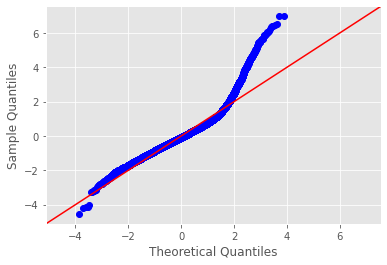

In [94]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

## Model 3 Fix Cat Features

In [95]:
hddf_no_out.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [96]:
hddf_no_out.grade.unique()

array([ 7,  6,  8,  5,  9, 10, 11,  4], dtype=int64)

In [97]:
hddf_no_out.view.unique()

array([0., 2., 1.])

In [98]:
condition_dummies = pd.get_dummies(hddf_no_out['condition'], prefix = 'cond', drop_first= True)

In [99]:
grade_dummies = pd.get_dummies(hddf_no_out['grade'], prefix = 'grade', drop_first= True)

In [100]:
view_dummies = pd.get_dummies(hddf_no_out['view'], prefix = 'view', drop_first= True)

In [101]:
grade_dummies.shape

(19414, 7)

In [102]:
view_dummies.shape

(19414, 2)

#### hddf_no_out_dum

In [103]:
hddf_no_out_dum = pd.concat([hddf_no_out,condition_dummies, grade_dummies, view_dummies], axis =1 )

In [104]:
hddf_no_out_dum.rename(columns={"view_1.0": "view_1", "view_2.0": "view_2"}, inplace=True)


In [105]:
hddf_no_out_dum.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,...,cond_5,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_1,view_2
0,7129300520,221900.0,3,1.00,1180,5650,1.0,60,3,7,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,64,3,7,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,82,3,6,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,50,5,7,...,1,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,8,...,0,0,0,0,1,0,0,0,0,0


In [106]:
hddf_no_out_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19414 entries, 0 to 21595
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19414 non-null  int64  
 1   price          19414 non-null  float64
 2   bedrooms       19414 non-null  int64  
 3   bathrooms      19414 non-null  float64
 4   sqft_living    19414 non-null  int64  
 5   sqft_lot       19414 non-null  int64  
 6   floors         19414 non-null  float64
 7   age            19414 non-null  int64  
 8   condition      19414 non-null  int64  
 9   grade          19414 non-null  int64  
 10  waterfront     19414 non-null  float64
 11  yrsince_reno   19414 non-null  float64
 12  sqft_above     19414 non-null  int64  
 13  sqft_basement  19414 non-null  float64
 14  view           19414 non-null  float64
 15  zipcode        19414 non-null  int64  
 16  lat            19414 non-null  float64
 17  long           19414 non-null  float64
 18  sqft_l

In [107]:
hddf_no_out_dum.drop(columns=['id', 'condition', 'view', 'grade', 'sqft_basement',], inplace = True)

In [108]:
hddf_no_out_dum.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'age', 'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'cond_2', 'cond_3', 'cond_4',
       'cond_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'view_1', 'view_2'],
      dtype='object')

In [109]:
hddf_no_out_dum.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'age', 'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'cond_2', 'cond_3', 'cond_4',
       'cond_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'view_1', 'view_2'],
      dtype='object')

In [110]:
outcome = 'price'
predictors = hddf_no_out_dum.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [111]:
model_3 = ols(formula = formula, data = hddf_no_out_dum).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1634.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:53:31   Log-Likelihood:            -2.5642e+05
No. Observations:               19414   AIC:                         5.129e+05
Df Residuals:                   19387   BIC:                         5.131e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.901e+06   2.03e+06     -1.428      0.153   -6.88e+06    1.08e+06
bedrooms      -1.071e+04   1474.692     -7.261      0.000   -1.36e+04   -7816.922
bathrooms      3.228e+04   2425.129     13.312      0.000    2.75e+04     3.7e+04
sqft_living      92.8872      3.457     26.868      0.000      86.111      99.664
sqft_lot          0.3109      0.143      2.167      0.030       0.030       0.592
floors         2.951e+04   2615.585     11.283      0.000    2.44e+04    3.46e+04
age            2710.0673     92.292     29.364      0.000    2529.167    2890.968
waterfront     5.692e-05   8.88e-06      6.408      0.000    3.95e-05    7.43e-05
yrsince_reno   -678.5692     94.844     -7.155      0.000    -864.471    -492.667
sqft_above       -5.0194      3.394     -1.479      0.139     -11.672       1.633
zipcode        -387.4582     23.258    -16.659      0.000    -433.047    -341.870
lat            5.775e+05   7404.747     77.985      0.000    5.63e+05    5.92e+05
long          -1.089e+05   1.04e+04    -10.494      0.000   -1.29e+05   -8.85e+04
sqft_living15    41.2736      2.708     15.244      0.000      35.967      46.581
sqft_lot15       -1.4249      0.186     -7.652      0.000      -1.790      -1.060
cond_2         1.968e+04   2.87e+04      0.687      0.492   -3.65e+04    7.59e+04
cond_3          3.77e+04   2.66e+04      1.415      0.157   -1.45e+04    8.99e+04
cond_4         6.598e+04   2.67e+04      2.476      0.013    1.37e+04    1.18e+05
cond_5         9.943e+04   2.68e+04      3.710      0.000    4.69e+04    1.52e+05
grade_5        1.646e+04   3.65e+04      0.451      0.652   -5.51e+04     8.8e+04
grade_6        5.032e+04   3.55e+04      1.418      0.156   -1.93e+04     1.2e+05
grade_7        1.029e+05   3.55e+04      2.902      0.004    3.34e+04    1.72e+05
grade_8        1.797e+05   3.56e+04      5.052      0.000     1.1e+05    2.49e+05
grade_9        3.092e+05   3.58e+04      8.639      0.000    2.39e+05    3.79e+05
grade_10       4.081e+05   3.61e+04     11.296      0.000    3.37e+05    4.79e+05
grade_11       5.037e+05   3.78e+04     13.311      0.000     4.3e+05    5.78e+05
view_1         9.295e+04   7973.057     11.658      0.000    7.73e+04    1.09e+05
view_2         7.299e+04   4986.210     14.639      0.000    6.32e+04    8.28e+04
==============================================================================
Omnibus:                     4996.600   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22129.820
Skew:                           1.196   Prob(JB):                         0.00
Kurtosis:                       7.651   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

**Observations**

In [112]:
X = hddf_no_out_dum.drop("price", axis = 1)
y = hddf_no_out_dum['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [113]:
print(len(X_train))

print(len(X_test))

14560
4854


In [114]:
model3_linreg = LinearRegression()
model3_linreg.fit(X_train, y_train)
y_pred = model3_linreg.predict(X_test)
residuals = y_pred - y_test

In [115]:
model3_linreg.coef_

array([-1.32970488e+04,  3.32426783e+04,  9.53766766e+01,  2.24052922e-01,
        3.01113268e+04,  2.82601481e+03, -6.81270649e-08, -7.74770832e+02,
       -5.50999336e+00, -3.87643315e+02,  5.70464668e+05, -1.02084758e+05,
        4.12752935e+01, -1.32573963e+00,  1.64633212e+02,  1.78006263e+04,
        4.61030079e+04,  7.96383084e+04,  2.13421932e+04,  5.29749206e+04,
        1.06597199e+05,  1.81228018e+05,  3.10594835e+05,  4.01056856e+05,
        4.96798512e+05,  9.34346530e+04,  7.27075858e+04])

In [116]:
mse_train = mean_squared_error(y_train, model3_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 132072.20998121792
Test RMSE: 131256.31064387024


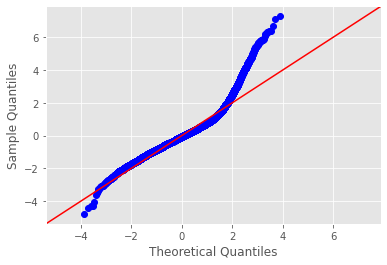

In [117]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [312]:
def plot_brms(ax, brms):
    col = 'sqft_living'
    x = np.linspace(5.9, 8.5)
    
    is_in = hddf_no_out_dum.loc[hddf_no_out_dum['bedrooms'] == brms, [col, 'price']]
    linreg = LinearRegression()
    linreg.fit(np.log(is_in[[col]]), np.log(is_in['price']))
    preds = linreg.predict(np.log(is_in[[col]]))
    ax.scatter(np.log(is_in[[col]]), np.log(is_in['price']), alpha=.3, label=None)

    coef = f'{linreg.coef_[0]:.2f}'
    label = "Bedrooms_is {} : {}:".format(brms, coef)
    return ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=label)


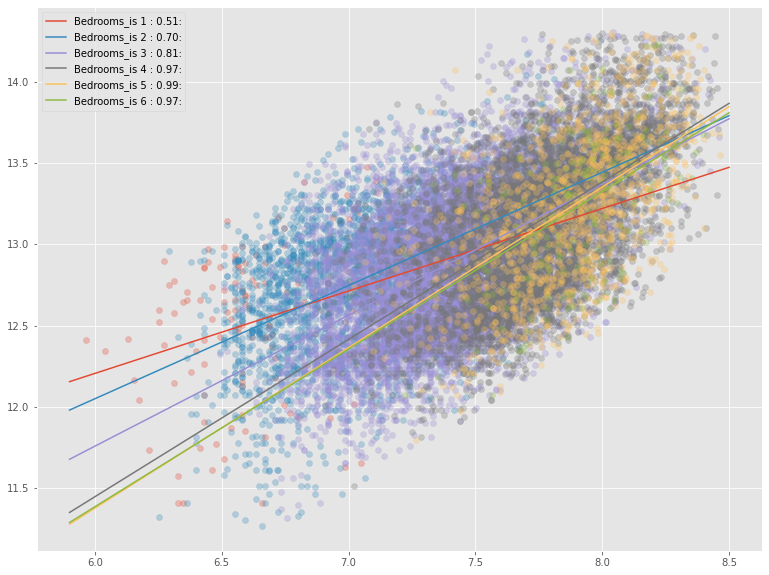

In [318]:

##Understanding negative correlation of bedrooms
# Visualization code here
fig, ax = plt.subplots(figsize=(13, 10))

for i in range(1,7):
    plot_brms(ax, i)

ax.legend()

In [120]:
try:
    bedrooms_df=hddf_no_out_dum.drop(columns=['sqft_lot', 'bathrooms','floors', 'age',
       'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'cond_2', 'cond_3', 'cond_4', 'cond_5',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'view_1', 'view_2', 'log_price', 'log_sqft_living',
       'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15',
       ])
except:
    bedrooms_df=hddf_no_out_dum

In [121]:
bedrooms_df['price_per_bedroom'] = bedrooms_df['price']/bedrooms_df['bedrooms']
bedrooms_df['price_per_sqft'] = bedrooms_df['price']/bedrooms_df['sqft_living']

In [122]:
br_group=bedrooms_df.groupby(by='bedrooms').mean()
br_group[['price','price_per_bedroom','sqft_living','price_per_sqft']]

,price,price_per_bedroom,sqft_living,price_per_sqft
bedrooms,,,,
1,318095.961039,318095.961039,891.870130,379.559994
2,388937.274487,194468.637244,1211.135114,331.642408
3,443293.384936,147764.461645,1755.485068,257.133547
4,562155.756885,140538.939221,2407.639180,234.117496
5,616760.016406,123352.003281,2714.442187,227.489489
6,614325.417989,102387.569665,2772.275132,222.587697


In [123]:
br_group

,price,bathrooms,sqft_living,sqft_lot,floors,age,waterfront,yrsince_reno,sqft_above,zipcode,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_1,view_2,price_per_bedroom,price_per_sqft
bedrooms,,,,,,,,,,,,,,,,,,,,,
1,318095.961039,1.137987,891.870130,8527.441558,1.159091,73.149351,0.0,68.915584,824.467532,98107.870130,...,0.402597,0.298701,0.071429,0.012987,0.000000,0.000000,0.006494,0.025974,318095.961039,379.559994
2,388937.274487,1.392567,1211.135114,6876.745257,1.303910,59.749129,0.0,58.068138,1085.655439,98107.993806,...,0.303523,0.444057,0.181959,0.023229,0.005033,0.000387,0.015486,0.032907,194468.637244,331.642408
3,443293.384936,1.946832,1755.485068,9588.131752,1.446091,43.365613,0.0,41.780193,1546.382521,98076.901845,...,0.089921,0.516249,0.286342,0.074879,0.023825,0.003074,0.012516,0.035793,147764.461645,257.133547
4,562155.756885,2.355902,2407.639180,11203.097377,1.605984,38.873279,0.0,37.063607,2090.201148,98070.180492,...,0.037213,0.346393,0.337049,0.193443,0.069344,0.013607,0.017213,0.042951,140538.939221,234.117496
5,616760.016406,2.583008,2714.442187,11000.510156,1.535156,42.382812,0.0,40.413281,2149.189063,98074.130469,...,0.029687,0.377344,0.318750,0.189844,0.071875,0.008594,0.019531,0.064844,123352.003281,227.489489
6,614325.417989,2.649471,2772.275132,11584.724868,1.494709,56.169312,0.0,53.095238,2095.820106,98080.576720,...,0.031746,0.449735,0.375661,0.084656,0.031746,0.010582,0.010582,0.079365,102387.569665,222.587697


In [124]:
bedrooms_df.bedrooms.value_counts()



3    9108
4    6100
2    2583
5    1280
6     189
1     154
Name: bedrooms, dtype: int64

## Model 4 - Transformations

In [125]:
hddf_no_out_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19414 entries, 0 to 21595
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              19414 non-null  float64
 1   bedrooms           19414 non-null  int64  
 2   bathrooms          19414 non-null  float64
 3   sqft_living        19414 non-null  int64  
 4   sqft_lot           19414 non-null  int64  
 5   floors             19414 non-null  float64
 6   age                19414 non-null  int64  
 7   waterfront         19414 non-null  float64
 8   yrsince_reno       19414 non-null  float64
 9   sqft_above         19414 non-null  int64  
 10  zipcode            19414 non-null  int64  
 11  lat                19414 non-null  float64
 12  long               19414 non-null  float64
 13  sqft_living15      19414 non-null  int64  
 14  sqft_lot15         19414 non-null  int64  
 15  cond_2             19414 non-null  uint8  
 16  cond_3             194

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

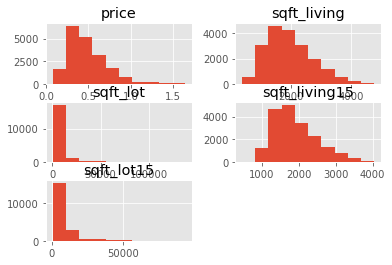

In [126]:
hddf_no_out_dum[['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].hist()

In [320]:
def transform_cols(cols):
    
    for col in cols:
        newcol = 'log_'+col
        hddf_no_out_dum[newcol] = np.log(hddf_no_out_dum[col])

In [321]:
cols=['price','sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15']
transform_cols(cols)

In [323]:
hddf_no_out_dum.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'age', 'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'cond_2', 'cond_3', 'cond_4',
       'cond_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'view_1', 'view_2', 'price_per_bedroom',
       'price_per_sqft', 'log_price', 'log_sqft_living', 'log_sqft_lot',
       'log_sqft_living15', 'log_sqft_lot15'],
      dtype='object')

array([[<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'log_sqft_living'}>],
       [<AxesSubplot:title={'center':'log_sqft_lot'}>,
        <AxesSubplot:title={'center':'log_sqft_living15'}>],
       [<AxesSubplot:title={'center':'log_sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

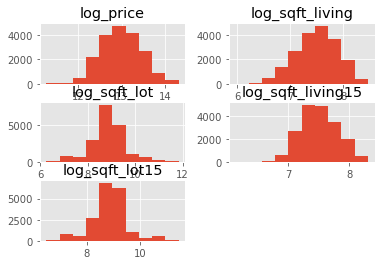

In [322]:
hddf_no_out_dum[['log_price','log_sqft_living', 'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15']].hist()

#### hddf_log

In [129]:
hddf_log = hddf_no_out_dum.drop(columns = ['price',
                                           'sqft_living', 
                                           'sqft_lot', 
                                           'sqft_living15', 
                                           'sqft_lot15', 
                                           'sqft_above', 
                                           'grade_5',
                                          ], axis = 1)

In [130]:
hddf_log = hddf_log.drop(columns = ['price_per_bedroom',
                                           'price_per_sqft', 
                                           
                                          ], axis = 1)

In [131]:
outcome = 'log_price'
predictors = hddf_log.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [132]:
model_4 = ols(formula = formula, data = hddf_log).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2244.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:53:37   Log-Likelihood:                 250.53
No. Observations:               19414   AIC:                            -451.1
Df Residuals:                   19389   BIC:                            -254.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.6664      3.706     -0.989      0.322     -10.930       3.597
bedrooms             -0.0207      0.003     -7.640      0.000      -0.026      -0.015
bathrooms             0.0559      0.004     12.747      0.000       0.047       0.064
floors                0.0363      0.005      8.032      0.000       0.027       0.045
age                   0.0048      0.000     28.812      0.000       0.004       0.005
waterfront         5.566e-14    1.3e-14      4.289      0.000    3.02e-14    8.11e-14
yrsince_reno         -0.0010      0.000     -5.741      0.000      -0.001      -0.001
zipcode              -0.0006   4.22e-05    -14.073      0.000      -0.001      -0.001
lat                   1.4029      0.013    104.662      0.000       1.377       1.429
long                 -0.0293      0.019     -1.579      0.114      -0.066       0.007
cond_2                0.1043      0.052      2.009      0.045       0.003       0.206
cond_3                0.2075      0.048      4.297      0.000       0.113       0.302
cond_4                0.2660      0.048      5.508      0.000       0.171       0.361
cond_5                0.3233      0.049      6.655      0.000       0.228       0.418
grade_6               0.1445      0.017      8.365      0.000       0.111       0.178
grade_7               0.2814      0.017     16.425      0.000       0.248       0.315
grade_8               0.4411      0.018     24.598      0.000       0.406       0.476
grade_9               0.6439      0.019     33.610      0.000       0.606       0.681
grade_10              0.7698      0.021     36.788      0.000       0.729       0.811
grade_11              0.8721      0.029     30.112      0.000       0.815       0.929
view_1                0.1641      0.014     11.382      0.000       0.136       0.192
view_2                0.1282      0.009     14.239      0.000       0.111       0.146
log_sqft_living       0.3412      0.010     35.620      0.000       0.322       0.360
log_sqft_lot         -0.0051      0.006     -0.886      0.376      -0.016       0.006
log_sqft_living15     0.2289      0.009     24.546      0.000       0.211       0.247
log_sqft_lot15       -0.0644      0.006    -10.257      0.000      -0.077      -0.052
==============================================================================
Omnibus:                      308.800   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.622
Skew:                           0.032   Prob(JB):                    3.10e-132
Kurtosis:                       3.863   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

**Observations**
1. log_sqft_lot no longer relevant
2. long no longer relevant
3. waterfront no longer relevnant

In [133]:
X = hddf_log.drop("log_price", axis = 1)
y = hddf_log['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [134]:
model4_linreg = LinearRegression()
model4_linreg.fit(X_train, y_train)
y_pred = model4_linreg.predict(X_test)
residuals = y_pred - y_test

In [135]:
model4_linreg.coef_

array([-2.38356433e-02,  5.94897171e-02,  3.87189760e-02,  4.96815877e-03,
        5.55111512e-17, -1.08531942e-03, -6.26854910e-04,  1.39806343e+00,
       -2.05133916e-02,  8.07216560e-02,  1.84373031e-01,  2.43326025e-01,
        3.01279482e-01,  1.38273864e-01,  2.77718780e-01,  4.32487732e-01,
        6.34760929e-01,  7.54959143e-01,  8.56224860e-01,  1.62453908e-01,
        1.27135106e-01,  3.43797209e-01, -4.58453697e-03,  2.28188945e-01,
       -6.46019459e-02])

In [136]:
mse_train = mean_squared_error(y_train, model4_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.2400775355248702
Test RMSE: 0.23537694857208655


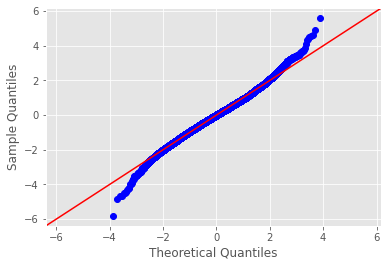

In [137]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

**Observations**

## Model 5

1. log_sqft_lot no longer relevant
2. waterfront no longer relevnant

#### hddf_log5

In [138]:
hddf_log5 = hddf_log.drop(columns = ['log_sqft_lot', 'waterfront' ], axis = 1,)
hddf_log5.reset_index(inplace=True)

In [139]:
hddf_log5.head()

,index,bedrooms,bathrooms,floors,age,yrsince_reno,zipcode,lat,long,cond_2,...,grade_8,grade_9,grade_10,grade_11,view_1,view_2,log_price,log_sqft_living,log_sqft_living15,log_sqft_lot15
0,0,3,1.00,1.0,60,60.0,98178,47.5112,-122.257,0,...,0,0,0,0,0,0,12.309982,7.073270,7.200425,8.639411
1,1,3,2.25,2.0,64,24.0,98125,47.7210,-122.319,0,...,0,0,0,0,0,0,13.195614,7.851661,7.432484,8.941022
2,2,2,1.00,1.0,82,82.0,98028,47.7379,-122.233,0,...,0,0,0,0,0,0,12.100712,6.646391,7.908387,8.994917
3,3,4,3.00,1.0,50,50.0,98136,47.5208,-122.393,0,...,0,0,0,0,0,0,13.311329,7.580700,7.215240,8.517193
4,4,3,2.00,1.0,28,28.0,98074,47.6168,-122.045,0,...,1,0,0,0,0,0,13.142166,7.426549,7.495542,8.923058


In [140]:
outcome = 'log_price'
predictors = hddf_log5.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [141]:
model_5 = ols(formula = formula, data = hddf_log5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2248.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:53:38   Log-Likelihood:                 265.18
No. Observations:               19414   AIC:                            -480.4
Df Residuals:                   19389   BIC:                            -283.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.3920      3.683     -0.921      0.357     -10.610       3.826
index              1.565e-06   2.85e-07      5.483      0.000    1.01e-06    2.12e-06
bedrooms             -0.0207      0.003     -7.644      0.000      -0.026      -0.015
bathrooms             0.0562      0.004     12.845      0.000       0.048       0.065
floors                0.0359      0.004      8.000      0.000       0.027       0.045
age                   0.0049      0.000     29.102      0.000       0.005       0.005
yrsince_reno         -0.0010      0.000     -5.693      0.000      -0.001      -0.001
zipcode              -0.0006   4.21e-05    -14.136      0.000      -0.001      -0.001
lat                   1.4030      0.013    104.890      0.000       1.377       1.429
long                 -0.0283      0.018     -1.529      0.126      -0.065       0.008
cond_2                0.1074      0.052      2.071      0.038       0.006       0.209
cond_3                0.2117      0.048      4.390      0.000       0.117       0.306
cond_4                0.2703      0.048      5.604      0.000       0.176       0.365
cond_5                0.3274      0.048      6.752      0.000       0.232       0.423
grade_6               0.1457      0.017      8.443      0.000       0.112       0.180
grade_7               0.2839      0.017     16.575      0.000       0.250       0.317
grade_8               0.4436      0.018     24.753      0.000       0.408       0.479
grade_9               0.6460      0.019     33.747      0.000       0.609       0.684
grade_10              0.7718      0.021     36.906      0.000       0.731       0.813
grade_11              0.8751      0.029     30.231      0.000       0.818       0.932
view_1                0.1646      0.014     11.425      0.000       0.136       0.193
view_2                0.1282      0.009     14.251      0.000       0.111       0.146
log_sqft_living       0.3394      0.009     35.857      0.000       0.321       0.358
log_sqft_living15     0.2290      0.009     24.578      0.000       0.211       0.247
log_sqft_lot15       -0.0674      0.003    -20.199      0.000      -0.074      -0.061
==============================================================================
Omnibus:                      311.207   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.262
Skew:                           0.029   Prob(JB):                    6.79e-134
Kurtosis:                       3.869   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinear

**Observations** all features look good
need to check for multicolinearity between features

In [142]:
X = hddf_log5.drop("log_price", axis = 1)
y = hddf_log5['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [143]:
model5_linreg = LinearRegression()
model5_linreg.fit(X_train, y_train)
y_pred = model5_linreg.predict(X_test)
residuals = y_pred - y_test

In [144]:
model5_linreg.coef_

array([ 1.32788567e-06, -2.37927021e-02,  5.96796149e-02,  3.83716865e-02,
        5.01293350e-03, -1.07672934e-03, -6.28420995e-04,  1.39821400e+00,
       -1.96524842e-02,  8.53716756e-02,  1.89768474e-01,  2.48652072e-01,
        3.06474179e-01,  1.39417535e-01,  2.79766390e-01,  4.34781703e-01,
        6.36797380e-01,  7.56610980e-01,  8.58915431e-01,  1.62566267e-01,
        1.27014804e-01,  3.42519351e-01,  2.28117944e-01, -6.73167686e-02])

In [145]:
mse_train = mean_squared_error(y_train, model5_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.239948550844846
Test RMSE: 0.2350544540321621


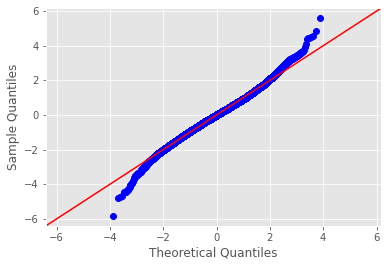

In [146]:
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

In [147]:
hddf_log5.columns

Index(['index', 'bedrooms', 'bathrooms', 'floors', 'age', 'yrsince_reno',
       'zipcode', 'lat', 'long', 'cond_2', 'cond_3', 'cond_4', 'cond_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'view_1', 'view_2', 'log_price', 'log_sqft_living', 'log_sqft_living15',
       'log_sqft_lot15'],
      dtype='object')

In [148]:
feat5 =['bedrooms', 'bathrooms', 'floors', 'age', 'yrsince_reno', 'zipcode',
       'lat', 'long', 'cond_2', 'cond_3', 'cond_4', 'cond_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'view_1',
       'view_2', 'log_price', 'log_sqft_living', 'log_sqft_living15',
       'log_sqft_lot15']

In [149]:
corr = hddf_log5[feat5].corr()
corr

,bedrooms,bathrooms,floors,age,yrsince_reno,zipcode,lat,long,cond_2,cond_3,...,grade_8,grade_9,grade_10,grade_11,view_1,view_2,log_price,log_sqft_living,log_sqft_living15,log_sqft_lot15
bedrooms,1.000000,0.490961,0.164427,-0.166247,-0.170842,-0.169266,-0.036966,0.173683,-0.045306,-0.001051,...,0.101108,0.179680,0.115193,0.052386,0.012709,0.039297,0.309645,0.636924,0.409922,0.202570
bathrooms,0.490961,1.000000,0.516613,-0.549132,-0.568044,-0.216688,0.001470,0.270483,-0.074997,0.200915,...,0.269544,0.303237,0.237521,0.110289,0.029036,0.069462,0.468042,0.728291,0.538146,0.008335
floors,0.164427,0.516613,1.000000,-0.508183,-0.515980,-0.061218,0.040225,0.143387,-0.051817,0.326207,...,0.232535,0.268724,0.166387,0.078717,-0.025116,-0.001783,0.297115,0.358090,0.266484,-0.317644
age,-0.166247,-0.549132,-0.508183,1.000000,0.933608,0.341579,0.155621,-0.427295,0.067356,-0.386827,...,-0.230982,-0.242967,-0.153144,-0.065465,0.039371,0.057343,-0.063336,-0.359001,-0.349992,0.038823
yrsince_reno,-0.170842,-0.568044,-0.515980,0.933608,1.000000,0.318610,0.145448,-0.404288,0.071293,-0.418087,...,-0.238145,-0.246721,-0.151249,-0.061756,0.034994,0.047404,-0.095798,-0.372208,-0.338908,0.047675
zipcode,-0.169266,-0.216688,-0.061218,0.341579,0.318610,1.000000,0.279781,-0.580832,0.029274,0.030496,...,-0.073809,-0.098668,-0.070749,-0.030582,0.050488,0.076588,-0.022176,-0.232014,-0.307815,-0.269912
lat,-0.036966,0.001470,0.040225,0.155621,0.145448,0.279781,1.000000,-0.133483,-0.019360,0.039580,...,0.031007,0.045684,0.052767,0.021433,0.013105,0.008515,0.507870,0.023246,0.029091,-0.124515
long,0.173683,0.270483,0.143387,-0.427295,-0.404288,-0.580832,-0.133483,1.000000,-0.033644,0.091077,...,0.055439,0.149615,0.129114,0.046941,-0.064003,-0.065478,0.078216,0.303815,0.400499,0.338760
cond_2,-0.045306,-0.074997,-0.051817,0.067356,0.071293,0.029274,-0.019360,-0.033644,1.000000,-0.118130,...,-0.039818,-0.029096,-0.014370,-0.007007,-0.005723,-0.014704,-0.086115,-0.078869,-0.054575,0.018447
cond_3,-0.001051,0.200915,0.326207,-0.386827,-0.418087,0.030496,0.039580,0.091077,-0.118130,1.000000,...,0.082304,0.117864,0.091328,0.044486,-0.022344,-0.015024,0.021135,0.099091,0.116211,-0.168396


In [150]:
#looking for pairwise correlations over .65 is a sign of multicolinearity

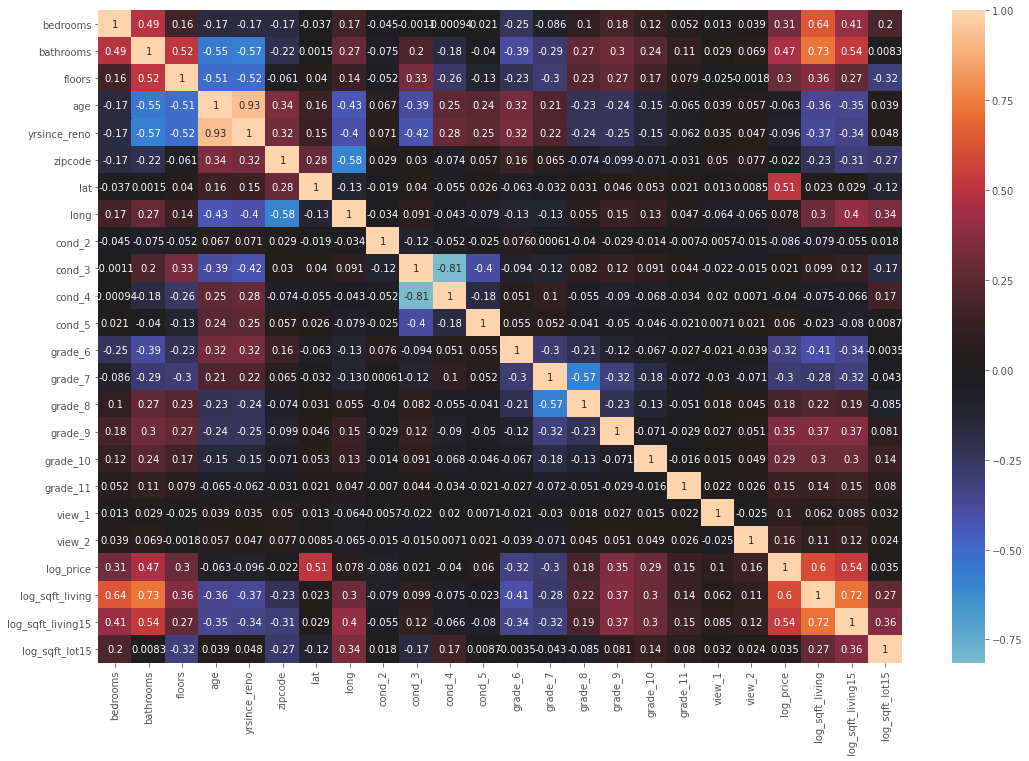

In [151]:
plt.figure(figsize=(18,12))
sns.heatmap(corr, center=0, annot=True);

**Observations**: Looking for values greater than .65<br> 
Some high correlation between (bedrooms and log_sqft_living) .73, <br> 
    (log_sqft_living and logsqftliving15).72, <br> and (age and age_since_reno) .93.  <br>
    Can remove logsqftliving15 and either age and age_since_reno

School districts zipcodes
Tacoma 98002
fed way 98003 270
Bellevue -98005
Riverview 98019
enumclaw 98022
Isaaquah 98027
Kent 98031
Tahoma 98038
Mercer Island -98040 204
Lake Washington-98052
snoqualmie 98065 268
vashon island 98070 46
seattle pub 98134
shoreline - 98155 424
highline 98166 217
tukwila 98168 264


98001-98199

In [152]:
hddf_log5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              19414 non-null  int64  
 1   bedrooms           19414 non-null  int64  
 2   bathrooms          19414 non-null  float64
 3   floors             19414 non-null  float64
 4   age                19414 non-null  int64  
 5   yrsince_reno       19414 non-null  float64
 6   zipcode            19414 non-null  int64  
 7   lat                19414 non-null  float64
 8   long               19414 non-null  float64
 9   cond_2             19414 non-null  uint8  
 10  cond_3             19414 non-null  uint8  
 11  cond_4             19414 non-null  uint8  
 12  cond_5             19414 non-null  uint8  
 13  grade_6            19414 non-null  uint8  
 14  grade_7            19414 non-null  uint8  
 15  grade_8            19414 non-null  uint8  
 16  grade_9            194

In [153]:
len(sorted(hddf_log5['zipcode'].unique()))

70

In [154]:
hddf_log5['zipcode'].min()

98001

Using the haversine formlula mentioned in the following blogs as reference:
https://abeflansburg.medium.com/distance-between-two-sets-of-geographic-coordinates-latitude-longitude-in-ruby-js-sql-and-37c3584cb9ad<br>
https://dev.to/upwardtrajectory/engineering-location-features-with-haversine-s-formula-for-prediction-modeling-23n2<br>
https://towardsdatascience.com/heres-how-to-calculate-distance-between-2-geolocations-in-python-93ecab5bbba4<br>

, I adjusted the 
approach to measure the distance from the top four employers instead of two cities.

In [155]:
!pip install haversine

In [156]:
import haversine as hs

In [157]:
amazon=(47.62254,-122.33687)
microsoft=(47.64235,-122.13693)
swedish_iss=(47.63596,-122.02153)
boeing_rent=(47.49226,-122.20616)
loc2=(47.4870,-122.320)
hs.haversine(amazon,loc2)

15.124458981947448

In [158]:
hddf_log5['lat_long'] = tuple(zip(hddf_log5['lat'],hddf_log5['long']))

In [159]:
hddf_log5['lat_long'].tail()

19409    (47.5537, -122.398)
19410    (47.5773, -122.409)
19411    (47.6993, -122.346)
19412    (47.5107, -122.362)
19413    (47.5345, -122.069)
Name: lat_long, dtype: object

In [160]:
#calculate distance from each of the top employers in the county
distance = []

for i in hddf_log5.lat_long:
    dist_ama = hs.haversine(amazon,i,unit='mi')
    dist_micro = hs.haversine(microsoft,i,unit='mi')
    dist_swed = hs.haversine(swedish_iss,i,unit='mi')
    dist_boeing = hs.haversine(boeing_rent,i,unit='mi')
    distance.append(min(dist_ama,dist_micro,dist_swed,dist_swed))

In [161]:
hddf_log5['distance'] = pd.Series(distance)

In [162]:
hddf_log5['distance']

0        8.546605
1        6.853555
2        7.971782
3        7.500724
4        1.716678
           ...   
19409    5.544209
19410    4.589522
19411    5.320602
19412    7.815713
19413    7.350999
Name: distance, Length: 19414, dtype: float64

In [163]:
hddf_log5['lat_long']

0        (47.5112, -122.257)
1         (47.721, -122.319)
2        (47.7379, -122.233)
3        (47.5208, -122.393)
4        (47.6168, -122.045)
                ...         
19409    (47.5537, -122.398)
19410    (47.5773, -122.409)
19411    (47.6993, -122.346)
19412    (47.5107, -122.362)
19413    (47.5345, -122.069)
Name: lat_long, Length: 19414, dtype: object

## Model 6 Distance 

#### hddf_log6

In [164]:
hddf_log6 = hddf_log5.drop(columns = ['lat_long', 'lat','long','index','yrsince_reno',
                                      'log_sqft_living15' ], axis = 1,)


In [165]:
hddf_log6.head()

,bedrooms,bathrooms,floors,age,zipcode,cond_2,cond_3,cond_4,cond_5,grade_6,...,grade_8,grade_9,grade_10,grade_11,view_1,view_2,log_price,log_sqft_living,log_sqft_lot15,distance
0,3,1.00,1.0,60,98178,0,1,0,0,0,...,0,0,0,0,0,0,12.309982,7.073270,8.639411,8.546605
1,3,2.25,2.0,64,98125,0,1,0,0,0,...,0,0,0,0,0,0,13.195614,7.851661,8.941022,6.853555
2,2,1.00,1.0,82,98028,0,1,0,0,1,...,0,0,0,0,0,0,12.100712,6.646391,8.994917,7.971782
3,4,3.00,1.0,50,98136,0,0,0,1,0,...,0,0,0,0,0,0,13.311329,7.580700,8.517193,7.500724
4,3,2.00,1.0,28,98074,0,1,0,0,0,...,1,0,0,0,0,0,13.142166,7.426549,8.923058,1.716678


In [166]:
outcome = 'log_price'
predictors = hddf_log6.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables


In [167]:
model_6 = ols(formula = formula, data = hddf_log6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     3320.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:54:02   Log-Likelihood:                 1784.6
No. Observations:               19414   AIC:                            -3527.
Df Residuals:                   19393   BIC:                            -3362.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          84.4583      3.388     24.929      0.000      77.818      91.099
bedrooms           -0.0249      0.002     -9.943      0.000      -0.030      -0.020
bathrooms           0.0485      0.004     12.091      0.000       0.041       0.056
floors              0.0356      0.004      8.620      0.000       0.028       0.044
age                 0.0027   8.16e-05     33.188      0.000       0.003       0.003
zipcode            -0.0008   3.45e-05    -22.233      0.000      -0.001      -0.001
cond_2              0.0744      0.048      1.552      0.121      -0.020       0.168
cond_3              0.2183      0.045      4.901      0.000       0.131       0.306
cond_4              0.2664      0.045      5.979      0.000       0.179       0.354
cond_5              0.3245      0.045      7.243      0.000       0.237       0.412
grade_6             0.1256      0.016      7.884      0.000       0.094       0.157
grade_7             0.2868      0.016     18.199      0.000       0.256       0.318
grade_8             0.4330      0.016     26.328      0.000       0.401       0.465
grade_9             0.6064      0.018     34.553      0.000       0.572       0.641
grade_10            0.6926      0.019     36.029      0.000       0.655       0.730
grade_11            0.8196      0.027     30.828      0.000       0.767       0.872
view_1              0.1672      0.013     12.618      0.000       0.141       0.193
view_2              0.1363      0.008     16.489      0.000       0.120       0.153
log_sqft_living     0.4274      0.008     52.161      0.000       0.411       0.443
log_sqft_lot15      0.0062      0.003      2.098      0.036       0.000       0.012
distance           -0.0373      0.000   -132.081      0.000      -0.038      -0.037
==============================================================================
Omnibus:                      539.563   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1364.663
Skew:                          -0.044   Prob(JB):                    4.65e-297
Kurtosis:                       4.296   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
X = hddf_log6.drop("log_price", axis = 1)
y = hddf_log6['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [169]:
model6_linreg = LinearRegression()
model6_linreg.fit(X_train, y_train)
y_pred = model6_linreg.predict(X_test)
residuals = y_pred - y_test

In [170]:
model6_linreg.coef_

array([-0.02776458,  0.05089336,  0.03929001,  0.00274754, -0.00080889,
        0.04531661,  0.19883733,  0.24556404,  0.30455976,  0.12266301,
        0.28516336,  0.42771915,  0.60053861,  0.68075352,  0.80672763,
        0.16684553,  0.1362301 ,  0.42857337,  0.00742622, -0.03726558])

In [171]:
mse_train = mean_squared_error(y_train, model6_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.22211946389391873
Test RMSE: 0.21659748035627946


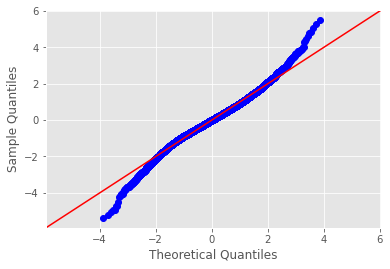

In [172]:
fig = sm.graphics.qqplot(model_6.resid, dist=stats.norm, line='45', fit=True)

**Observation** R2 Model a bit less after adding distance.  

## Model 7 zipcode dummies

In [173]:
zipcode_dummies = pd.get_dummies(hddf_log6['zipcode'], prefix = 'zip', drop_first= True)

#### hddf_log7

In [174]:
hddf_log7 = pd.concat([hddf_log6,zipcode_dummies], axis =1 )


In [175]:
hddf_log7 = hddf_log7.drop(columns = ['zipcode', 'floors', 'zip_98002',
                                      'zip_98003', 'zip_98042', 'zip_98058',
                                      'zip_98092', 'zip_98106','zip_98166' ], axis = 1,)

In [176]:
hddf_log7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         19414 non-null  int64  
 1   bathrooms        19414 non-null  float64
 2   age              19414 non-null  int64  
 3   cond_2           19414 non-null  uint8  
 4   cond_3           19414 non-null  uint8  
 5   cond_4           19414 non-null  uint8  
 6   cond_5           19414 non-null  uint8  
 7   grade_6          19414 non-null  uint8  
 8   grade_7          19414 non-null  uint8  
 9   grade_8          19414 non-null  uint8  
 10  grade_9          19414 non-null  uint8  
 11  grade_10         19414 non-null  uint8  
 12  grade_11         19414 non-null  uint8  
 13  view_1           19414 non-null  uint8  
 14  view_2           19414 non-null  uint8  
 15  log_price        19414 non-null  float64
 16  log_sqft_living  19414 non-null  float64
 17  log_sqft_lot

In [177]:
outcome = 'log_price'
predictors = hddf_log7.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [178]:
model_7 = ols(formula = formula, data = hddf_log7).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1460.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:54:04   Log-Likelihood:                 6295.3
No. Observations:               19414   AIC:                        -1.243e+04
Df Residuals:                   19333   BIC:                        -1.179e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.6413      0.056    154.338      0.000       8.532       8.751
bedrooms           -0.0102      0.002     -5.059      0.000      -0.014      -0.006
bathrooms           0.0332      0.003     10.445      0.000       0.027       0.039
age                 0.0006   7.27e-05      8.812      0.000       0.000       0.001
cond_2              0.1107      0.038      2.903      0.004       0.036       0.186
cond_3              0.2400      0.035      6.766      0.000       0.170       0.309
cond_4              0.2670      0.035      7.526      0.000       0.197       0.337
cond_5              0.3225      0.036      9.038      0.000       0.253       0.392
grade_6             0.0811      0.013      6.350      0.000       0.056       0.106
grade_7             0.1582      0.013     12.436      0.000       0.133       0.183
grade_8             0.2621      0.013     19.607      0.000       0.236       0.288
grade_9             0.4047      0.014     28.299      0.000       0.377       0.433
grade_10            0.4763      0.016     30.347      0.000       0.446       0.507
grade_11            0.5979      0.021     27.827      0.000       0.556       0.640
view_1              0.1242      0.011     11.684      0.000       0.103       0.145
view_2              0.1209      0.007     18.180      0.000       0.108       0.134
log_sqft_living     0.4428      0.007     67.263      0.000       0.430       0.456
log_sqft_lot15      0.0555      0.003     20.496      0.000       0.050       0.061
distance           -0.0216      0.001    -39.132      0.000      -0.023      -0.021
zip_98004           0.7042      0.014     48.949      0.000       0.676       0.732
zip_98005           0.3349      0.017     19.670      0.000       0.302       0.368
zip_98006           0.2940      0.012     25.272      0.000       0.271       0.317
zip_98007           0.2264      0.018     12.916      0.000       0.192       0.261
zip_98008           0.2084      0.014     14.740      0.000       0.181       0.236
zip_98010           0.2049      0.020     10.136      0.000       0.165       0.245
zip_98011           0.1616      0.014     11.418      0.000       0.134       0.189
zip_98014          -0.0059      0.023     -0.261      0.794      -0.050       0.038
zip_98019           0.0224      0.015      1.467      0.142      -0.008       0.052
zip_98022           0.1863      0.016     11.937      0.000       0.156       0.217
zip_98023          -0.0396      0.009     -4.373      0.000      -0.057      -0.022
zip_98024           0.0951      0.026      3.593      0.000       0.043       0.147
zip_98027           0.2327      0.011     20.732      0.000       0.211       0.255
zip_98028           0.1386      0.012     11.504      0.000       0.115       0.162
zip_98029           0.2538      0.012     20.322      0.000

In [179]:
X = hddf_log7.drop("log_price", axis = 1)
y = hddf_log7['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [180]:
model7_linreg = LinearRegression()
model7_linreg.fit(X_train, y_train)
y_pred = model7_linreg.predict(X_test)
residuals = y_pred - y_test

In [181]:
model7_linreg.coef_

array([-1.26067129e-02,  3.60751031e-02,  7.01836747e-04,  9.42367419e-02,
        2.26955729e-01,  2.52310801e-01,  3.08976776e-01,  8.33984890e-02,
        1.61823986e-01,  2.63562774e-01,  4.05798996e-01,  4.71181003e-01,
        6.07186966e-01,  1.15469310e-01,  1.18080388e-01,  4.44319389e-01,
        5.48233431e-02, -2.13629661e-02,  7.28886886e-01,  3.31710606e-01,
        2.97564957e-01,  2.25500963e-01,  2.09703606e-01,  2.04880823e-01,
        1.51819388e-01, -4.39925873e-02,  2.48375561e-02,  1.77248355e-01,
       -4.11851415e-02,  1.20618037e-01,  2.30903418e-01,  1.42576662e-01,
        2.55195788e-01, -3.05235542e-02, -4.98755770e-02, -1.55657377e-01,
        3.80620540e-01,  1.88552914e-01,  9.96308617e-02,  8.84055369e-01,
        5.55068764e-01,  1.74782281e-01,  2.36289928e-01,  2.28118700e-01,
       -6.17115116e-02,  5.44057563e-02,  9.69663314e-02,  1.97882681e-01,
        1.81796960e-01,  1.89930772e-01,  1.27056724e-01,  2.08456717e-01,
        1.46766535e-01,  

In [182]:
mse_train = mean_squared_error(y_train, model7_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.17586824584270275
Test RMSE: 0.17279707456098334


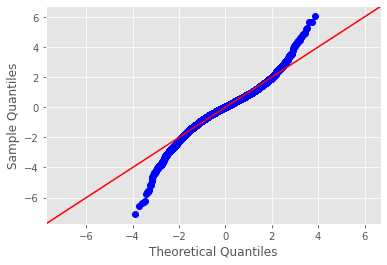

In [183]:
fig = sm.graphics.qqplot(model_7.resid, dist=stats.norm, line='45', fit=True)

**Observation** model 86% variance explained all features relevant

question  why grade and condition in model? is view helpful?
reducing cat var no more than continous
bin condition?  <3 
bin grade >8 


In [184]:
try:
    hddf_no_out.reset_index(inplace=True)
except ValueError:
    print("A ValueError exception occurred")

#hddf_no_out
want to go bck and create feature where grade is 8+ and remove condition

In [185]:

bins = [1,5.99,7.99,13]
hddf_no_out['bin_grade'] = pd.cut(hddf_no_out['grade'],bins)

In [186]:
hddf_no_out['bin_grade'].value_counts()

(5.99, 7.99]    10512
(7.99, 13.0]     8683
(1.0, 5.99]       219
Name: bin_grade, dtype: int64

In [187]:
hddf_no_out[hddf_no_out['grade']>=8]

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,...,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15,bin_grade
4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,...,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503,"(7.99, 13.0]"
18,22,7137970340,285000.0,5,2.50,2270,6300,2.0,20,3,...,20.0,2270,0.0,0.0,98092,47.3266,-122.169,2240,7005,"(7.99, 13.0]"
20,24,3814700200,329000.0,3,2.25,2450,6500,2.0,30,4,...,30.0,2450,0.0,0.0,98030,47.3739,-122.172,2200,6865,"(7.99, 13.0]"
22,26,1794500383,937000.0,3,1.75,2450,2691,2.0,100,3,...,100.0,1750,700.0,0.0,98119,47.6386,-122.360,1760,3573,"(7.99, 13.0]"
23,27,3303700376,667000.0,3,1.00,1400,1581,1.5,106,5,...,106.0,1400,0.0,0.0,98112,47.6221,-122.314,1860,3861,"(7.99, 13.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,21590,7936000429,1010000.0,4,3.50,3510,7200,2.0,6,3,...,6.0,2600,910.0,0.0,98136,47.5537,-122.398,2050,6200,"(7.99, 13.0]"
19410,21591,2997800021,475000.0,3,2.50,1310,1294,2.0,7,3,...,7.0,1180,130.0,0.0,98116,47.5773,-122.409,1330,1265,"(7.99, 13.0]"
19411,21592,263000018,360000.0,3,2.50,1530,1131,3.0,6,3,...,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509,"(7.99, 13.0]"
19412,21593,6600060120,400000.0,4,2.50,2310,5813,2.0,1,3,...,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200,"(7.99, 13.0]"


#### hddf_8

In [188]:
hddf_8 = hddf_log7

In [189]:
hddf_8['bin_grade'] = hddf_no_out['bin_grade']

In [190]:
hddf_8.drop(columns = ['grade_6', 'grade_7', 'grade_8','grade_9', 'grade_10', 'grade_11'], axis = 1,inplace=True)

In [191]:
hddf_8.drop(columns = ['cond_2', 'cond_3', 'cond_4','cond_5'], axis = 1,inplace=True)

In [192]:
hddf_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bedrooms         19414 non-null  int64   
 1   bathrooms        19414 non-null  float64 
 2   age              19414 non-null  int64   
 3   view_1           19414 non-null  uint8   
 4   view_2           19414 non-null  uint8   
 5   log_price        19414 non-null  float64 
 6   log_sqft_living  19414 non-null  float64 
 7   log_sqft_lot15   19414 non-null  float64 
 8   distance         19414 non-null  float64 
 9   zip_98004        19414 non-null  uint8   
 10  zip_98005        19414 non-null  uint8   
 11  zip_98006        19414 non-null  uint8   
 12  zip_98007        19414 non-null  uint8   
 13  zip_98008        19414 non-null  uint8   
 14  zip_98010        19414 non-null  uint8   
 15  zip_98011        19414 non-null  uint8   
 16  zip_98014        19414 non-null  uint8  

In [193]:
grade_dummies = pd.get_dummies(hddf_8['bin_grade'], prefix = 'grade', drop_first= True)

In [194]:
hddf_8 = pd.concat([hddf_8,grade_dummies], axis =1 )

In [195]:
hddf_8.rename(columns={"grade_(5.99, 7.99]": "grade_6_8", "grade_(7.99, 13.0]": "grade_8_13"}, inplace=True)

In [196]:
hddf_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bedrooms         19414 non-null  int64   
 1   bathrooms        19414 non-null  float64 
 2   age              19414 non-null  int64   
 3   view_1           19414 non-null  uint8   
 4   view_2           19414 non-null  uint8   
 5   log_price        19414 non-null  float64 
 6   log_sqft_living  19414 non-null  float64 
 7   log_sqft_lot15   19414 non-null  float64 
 8   distance         19414 non-null  float64 
 9   zip_98004        19414 non-null  uint8   
 10  zip_98005        19414 non-null  uint8   
 11  zip_98006        19414 non-null  uint8   
 12  zip_98007        19414 non-null  uint8   
 13  zip_98008        19414 non-null  uint8   
 14  zip_98010        19414 non-null  uint8   
 15  zip_98011        19414 non-null  uint8   
 16  zip_98014        19414 non-null  uint8  

In [197]:
hddf_8 = pd.concat([hddf_8,hddf_no_out['zipcode']], axis =1 )

In [198]:
hddf_8

,bedrooms,bathrooms,age,view_1,view_2,log_price,log_sqft_living,log_sqft_lot15,distance,zip_98004,...,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,bin_grade,grade_6_8,grade_8_13,zipcode
0,3,1.00,60,0,0,12.309982,7.073270,8.639411,8.546605,0,...,0,0,1,0,0,0,"(5.99, 7.99]",1,0,98178
1,3,2.25,64,0,0,13.195614,7.851661,8.941022,6.853555,0,...,0,0,0,0,0,0,"(5.99, 7.99]",1,0,98125
2,2,1.00,82,0,0,12.100712,6.646391,8.994917,7.971782,0,...,0,0,0,0,0,0,"(5.99, 7.99]",1,0,98028
3,4,3.00,50,0,0,13.311329,7.580700,8.517193,7.500724,0,...,0,0,0,0,0,0,"(5.99, 7.99]",1,0,98136
4,3,2.00,28,0,0,13.142166,7.426549,8.923058,1.716678,0,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,4,3.50,6,0,0,13.825461,8.163371,8.732305,5.544209,0,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98136
19410,3,2.50,7,0,0,13.071070,7.177782,7.142827,4.589522,0,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98116
19411,3,2.50,6,0,0,12.793859,7.333023,7.319202,5.320602,0,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98103
19412,4,2.50,1,0,0,12.899220,7.745003,8.881836,7.815713,0,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98146


In [199]:
sorted(hddf_8.zipcode.unique())

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98038,
 98039,
 98040,
 98042,
 98045,
 98052,
 98053,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98092,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198,
 98199]

In [200]:
#Import districts package got get_districts
from code import districts

In [201]:
hddf_8['dist'] = pd.Series(districts.get_districts(hddf_8['zipcode']))

In [202]:
hddf_8['dist'].value_counts()

nseattle_9      4492
serural_2       2478
dtseattle_10    2433
anerural_1      2426
fedway_3        2187
redmond_8       2177
renton_5        1815
bellvue_7       1156
mercer_6         204
vi_4              46
Name: dist, dtype: int64

In [203]:
hddf_8.columns

Index(['bedrooms', 'bathrooms', 'age', 'view_1', 'view_2', 'log_price',
       'log_sqft_living', 'log_sqft_lot15', 'distance', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155',
       'zip_98168', 'zip_98177', 'zip_98178', 'zip_98188', 'zip_981

In [204]:
#hddf_8.drop(columns=['d_anerural_1','d_bellvue_7', 'd_dtseattle_10', 'd_fedway_3','d_mercer_6','d_nseattle_9', 'd_redmond_8', 'd_renton_5','d_serural_2', 'd_vi_4'], inplace=True)

In [205]:
hddf_8.columns

Index(['bedrooms', 'bathrooms', 'age', 'view_1', 'view_2', 'log_price',
       'log_sqft_living', 'log_sqft_lot15', 'distance', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155',
       'zip_98168', 'zip_98177', 'zip_98178', 'zip_98188', 'zip_981

In [206]:
dist_dummies = pd.get_dummies(hddf_8['dist'], prefix = 'd', drop_first= False)

In [207]:
dist_dummies

,d_anerural_1,d_bellvue_7,d_dtseattle_10,d_fedway_3,d_mercer_6,d_nseattle_9,d_redmond_8,d_renton_5,d_serural_2,d_vi_4
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
19409,0,0,1,0,0,0,0,0,0,0
19410,0,0,1,0,0,0,0,0,0,0
19411,0,0,0,0,0,1,0,0,0,0
19412,0,0,0,0,0,0,0,1,0,0


In [208]:
hddf_8 = pd.concat([hddf_8,dist_dummies], axis =1 )

In [209]:
hddf_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 86 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   bedrooms         19414 non-null  int64   
 1   bathrooms        19414 non-null  float64 
 2   age              19414 non-null  int64   
 3   view_1           19414 non-null  uint8   
 4   view_2           19414 non-null  uint8   
 5   log_price        19414 non-null  float64 
 6   log_sqft_living  19414 non-null  float64 
 7   log_sqft_lot15   19414 non-null  float64 
 8   distance         19414 non-null  float64 
 9   zip_98004        19414 non-null  uint8   
 10  zip_98005        19414 non-null  uint8   
 11  zip_98006        19414 non-null  uint8   
 12  zip_98007        19414 non-null  uint8   
 13  zip_98008        19414 non-null  uint8   
 14  zip_98010        19414 non-null  uint8   
 15  zip_98011        19414 non-null  uint8   
 16  zip_98014        19414 non-null  uint8  

In [210]:
hddf_8.columns

Index(['bedrooms', 'bathrooms', 'age', 'view_1', 'view_2', 'log_price',
       'log_sqft_living', 'log_sqft_lot15', 'distance', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98059', 'zip_98065', 'zip_98070',
       'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077', 'zip_98102',
       'zip_98103', 'zip_98105', 'zip_98107', 'zip_98108', 'zip_98109',
       'zip_98112', 'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118',
       'zip_98119', 'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133',
       'zip_98136', 'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155',
       'zip_98168', 'zip_98177', 'zip_98178', 'zip_98188', 'zip_981

#### hddf_8_dist

In [211]:
hddf_8_dist = hddf_8.drop(columns = ['zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98168', 'zip_98177', 'zip_98178',
       'zip_98188', 'zip_98198', 'zip_98199', 'bin_grade', 'zipcode', 'dist', ], axis = 1,)

In [212]:
hddf_8_dist.columns

Index(['bedrooms', 'bathrooms', 'age', 'view_1', 'view_2', 'log_price',
       'log_sqft_living', 'log_sqft_lot15', 'distance', 'grade_6_8',
       'grade_8_13', 'd_anerural_1', 'd_bellvue_7', 'd_dtseattle_10',
       'd_fedway_3', 'd_mercer_6', 'd_nseattle_9', 'd_redmond_8', 'd_renton_5',
       'd_serural_2', 'd_vi_4'],
      dtype='object')

#### hddf_8_ex

In [213]:
hddf_8_ex = hddf_8_dist

In [214]:
hddf_8_ex.columns

Index(['bedrooms', 'bathrooms', 'age', 'view_1', 'view_2', 'log_price',
       'log_sqft_living', 'log_sqft_lot15', 'distance', 'grade_6_8',
       'grade_8_13', 'd_anerural_1', 'd_bellvue_7', 'd_dtseattle_10',
       'd_fedway_3', 'd_mercer_6', 'd_nseattle_9', 'd_redmond_8', 'd_renton_5',
       'd_serural_2', 'd_vi_4'],
      dtype='object')

In [215]:
hddf_8_ex = hddf_8.drop(columns = ['zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98168', 'zip_98177', 'zip_98178',
       'zip_98188', 'zip_98198', 'zip_98199', 'bin_grade', ], axis = 1,)

In [216]:
hddf_8_ex['lat'] = hddf_no_out['lat']

In [217]:
hddf_8_ex['long'] = hddf_no_out['long']

In [218]:
hddf_8_ex.columns

Index(['bedrooms', 'bathrooms', 'age', 'view_1', 'view_2', 'log_price',
       'log_sqft_living', 'log_sqft_lot15', 'distance', 'grade_6_8',
       'grade_8_13', 'zipcode', 'dist', 'd_anerural_1', 'd_bellvue_7',
       'd_dtseattle_10', 'd_fedway_3', 'd_mercer_6', 'd_nseattle_9',
       'd_redmond_8', 'd_renton_5', 'd_serural_2', 'd_vi_4', 'lat', 'long'],
      dtype='object')

<AxesSubplot:title={'center':'10 Districts of Kings County'}, xlabel='long', ylabel='lat'>

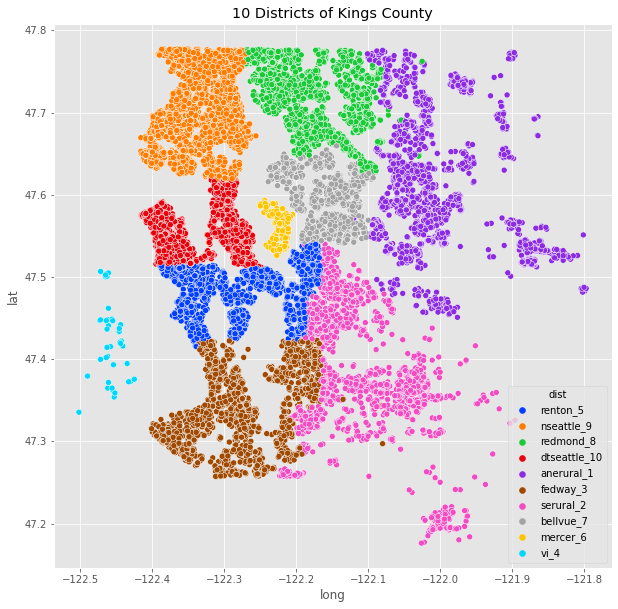

In [295]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('10 Districts of Kings County')
sns.scatterplot(x='long', y='lat', data=hddf_8_ex, hue='dist', palette='bright', ax =ax)

In [220]:
hddf_8_ex['dist'].value_counts()

nseattle_9      4492
serural_2       2478
dtseattle_10    2433
anerural_1      2426
fedway_3        2187
redmond_8       2177
renton_5        1815
bellvue_7       1156
mercer_6         204
vi_4              46
Name: dist, dtype: int64

<AxesSubplot:xlabel='dist', ylabel='log_price'>

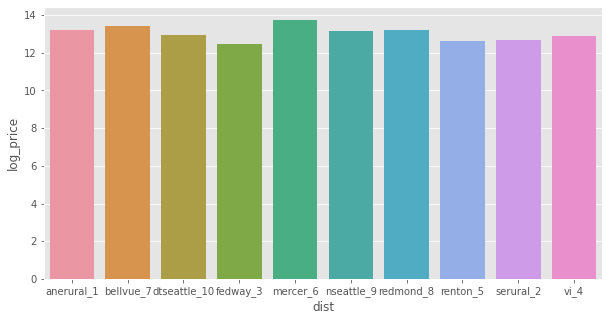

In [221]:
plt.figure(figsize=(10,5))
sns.barplot(x = "dist", y = "log_price", data = hddf_8_ex.groupby(by="dist", sort=True).mean().reset_index())

## Model 8 Districts and Grade Category

In [222]:
outcome = 'log_price'
predictors = hddf_8_dist.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [223]:
model_8 = ols(formula = formula, data = hddf_8_dist).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     3819.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:54:15   Log-Likelihood:                 2457.5
No. Observations:               19414   AIC:                            -4875.
Df Residuals:                   19394   BIC:                            -4718.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.8532      0.044    177.627      0.000       7.767       7.940
bedrooms           -0.0313      0.002    -12.953      0.000      -0.036      -0.027
bathrooms           0.0552      0.004     14.481      0.000       0.048       0.063
age                 0.0014   7.69e-05     18.429      0.000       0.001       0.002
view_1              0.1587      0.013     12.382      0.000       0.134       0.184
view_2              0.1446      0.008     18.098      0.000       0.129       0.160
log_sqft_living     0.5538      0.007     74.171      0.000       0.539       0.568
log_sqft_lot15      0.0274      0.003      9.347      0.000       0.022       0.033
distance           -0.0303      0.001    -56.398      0.000      -0.031      -0.029
grade_6_8           0.1043      0.015      6.962      0.000       0.075       0.134
grade_8_13          0.2588      0.016     16.441      0.000       0.228       0.290
d_anerural_1        0.7378      0.008     97.524      0.000       0.723       0.753
d_bellvue_7         0.9091      0.009    105.924      0.000       0.892       0.926
d_dtseattle_10      0.7006      0.007    104.142      0.000       0.687       0.714
d_fedway_3          0.6376      0.009     71.467      0.000       0.620       0.655
d_mercer_6          1.1549      0.015     77.345      0.000       1.126       1.184
d_nseattle_9        0.8855      0.006    140.341      0.000       0.873       0.898
d_redmond_8         0.7825      0.007    106.689      0.000       0.768       0.797
d_renton_5          0.5176      0.007     73.601      0.000       0.504       0.531
d_serural_2         0.7184      0.008     86.795      0.000       0.702       0.735
d_vi_4              0.8092      0.029     27.506      0.000       0.752       0.867
==============================================================================
Omnibus:                      613.954   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1527.478
Skew:                          -0.127   Prob(JB):                         0.00
Kurtosis:                       4.351   Cond. No.                     1.81e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [224]:
X = hddf_8_dist.drop("log_price", axis = 1)
y = hddf_8_dist['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [225]:
model8_linreg = LinearRegression()
model8_linreg.fit(X_train, y_train)
y_pred = model8_linreg.predict(X_test)
residuals = y_pred - y_test

In [226]:
model8_linreg.coef_

array([-3.39781200e-02,  5.86644987e-02,  1.46417164e-03,  1.47645970e-01,
        1.43332388e-01,  5.55184277e-01,  2.83500953e-02, -3.00254337e-02,
        1.06889876e-01,  2.58021100e-01, -4.43063231e-02,  1.30104230e-01,
       -8.58037770e-02, -1.50325131e-01,  3.65229926e-01,  9.89139690e-02,
       -4.34010180e-04, -2.71123358e-01, -6.73047404e-02,  2.50492145e-02])

In [227]:
mse_train = mean_squared_error(y_train, model8_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.2146664552329853
Test RMSE: 0.2088694793624043


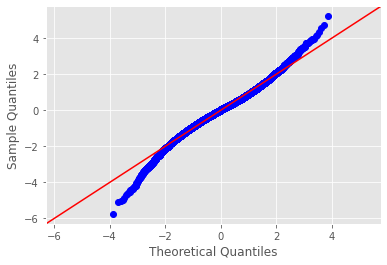

In [228]:
fig = sm.graphics.qqplot(model_8.resid, dist=stats.norm, line='45', fit=True)

**Observations:**  district MercerIsland6 no longer relevant 
age last renovated coefficient almost insignificant
Lets look at one last model with those features removed.

## Model 9 minus  fedway3 district removed

#### hddf_9 Drop d_fedway_3 district

In [229]:
hddf_9 = hddf_8_dist.drop(columns = ['d_fedway_3', ], axis = 1)

In [230]:
outcome = 'log_price'
predictors = hddf_9.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [231]:
model_9 = ols(formula = formula, data = hddf_9).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     3819.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:54:16   Log-Likelihood:                 2457.5
No. Observations:               19414   AIC:                            -4875.
Df Residuals:                   19394   BIC:                            -4718.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.4908      0.049    172.776      0.000       8.394       8.587
bedrooms           -0.0313      0.002    -12.953      0.000      -0.036      -0.027
bathrooms           0.0552      0.004     14.481      0.000       0.048       0.063
age                 0.0014   7.69e-05     18.429      0.000       0.001       0.002
view_1              0.1587      0.013     12.382      0.000       0.134       0.184
view_2              0.1446      0.008     18.098      0.000       0.129       0.160
log_sqft_living     0.5538      0.007     74.171      0.000       0.539       0.568
log_sqft_lot15      0.0274      0.003      9.347      0.000       0.022       0.033
distance           -0.0303      0.001    -56.398      0.000      -0.031      -0.029
grade_6_8           0.1043      0.015      6.962      0.000       0.075       0.134
grade_8_13          0.2588      0.016     16.441      0.000       0.228       0.290
d_anerural_1        0.1002      0.010      9.973      0.000       0.080       0.120
d_bellvue_7         0.2715      0.012     23.521      0.000       0.249       0.294
d_dtseattle_10      0.0630      0.010      6.228      0.000       0.043       0.083
d_mercer_6          0.5173      0.017     30.026      0.000       0.484       0.551
d_nseattle_9        0.2480      0.010     25.927      0.000       0.229       0.267
d_redmond_8         0.1450      0.010     14.553      0.000       0.125       0.164
d_renton_5         -0.1200      0.008    -14.119      0.000      -0.137      -0.103
d_serural_2         0.0808      0.006     12.603      0.000       0.068       0.093
d_vi_4              0.1716      0.032      5.339      0.000       0.109       0.235
==============================================================================
Omnibus:                      613.954   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1527.478
Skew:                          -0.127   Prob(JB):                         0.00
Kurtosis:                       4.351   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [232]:
X = hddf_9.drop("log_price", axis = 1)
y = hddf_9['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [233]:
model9_linreg = LinearRegression()
model9_linreg.fit(X_train, y_train)
y_pred = model9_linreg.predict(X_test)
residuals = y_pred - y_test

In [234]:
model9_linreg.coef_

array([-0.03397812,  0.0586645 ,  0.00146417,  0.14764597,  0.14333239,
        0.55518428,  0.0283501 , -0.03002543,  0.10688988,  0.2580211 ,
        0.10601881,  0.28042936,  0.06452135,  0.51555506,  0.2492391 ,
        0.14989112, -0.12079823,  0.08302039,  0.17537435])

In [235]:
mse_train = mean_squared_error(y_train, model9_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.21466645523298528
Test RMSE: 0.20886947936240435


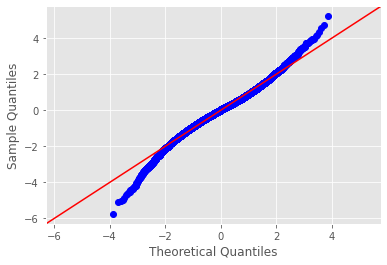

In [236]:
fig = sm.graphics.qqplot(model_9.resid, dist=stats.norm, line='45', fit=True)

    TODO Bedrooms interaction ...inversede log

#### hddf_8_ex

Folium exploration

In [237]:
hddf_8_ex.groupby("dist").median()[["lat", "long", "bedrooms"]]

,lat,long,bedrooms
dist,,,
anerural_1,47.59360,-122.020,3
bellvue_7,47.59655,-122.151,4
dtseattle_10,47.55510,-122.321,3
fedway_3,47.33630,-122.286,3
mercer_6,47.56250,-122.224,4
nseattle_9,47.68600,-122.340,3
redmond_8,47.71880,-122.180,3
renton_5,47.49050,-122.271,3
serural_2,47.37010,-122.122,3


In [238]:

zipcode_g = hddf_8_ex.groupby("dist").mean()[["lat", "long", "age"]].values.tolist()
zipcode_g

[[47.60961673536685, -122.00270939818647, 22.744435284418795],
 [47.59511963667822, -122.15509169550182, 45.18339100346021],
 [47.55910032881224, -122.33372626387187, 59.8734073160707],
 [47.341111659808, -122.27718884316418, 37.90534979423868],
 [47.56048725490193, -122.22501960784315, 45.98529411764706],
 [47.69123450578803, -122.33788312555662, 61.03517364203027],
 [47.71424092788247, -122.17635140101052, 34.98621956821314],
 [47.48384920110196, -122.26826446280977, 52.17465564738292],
 [47.38262324455199, -122.10379661016948, 28.21630347054076],
 [47.421171739130436, -122.45630434782615, 48.91304347826087]]

In [239]:
import folium
from folium import plugins

m = folium.Map(location=[47.56054, -121.91481],zoom_start=10)
plugins.HeatMap(data = zipcode_g).add_to(m)
m

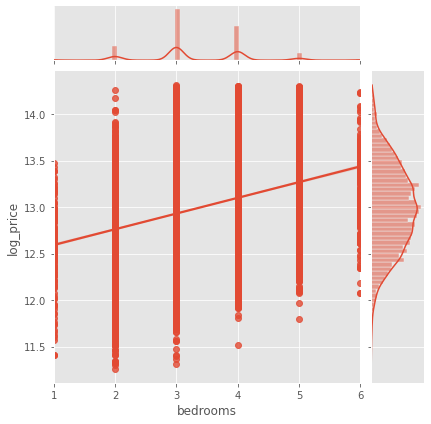

In [240]:
sns.jointplot(x='bedrooms',y='log_price', data=hddf_8_ex, kind='reg');

## Model 10 Check for interactions

In [241]:
hddf_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         19414 non-null  int64  
 1   bathrooms        19414 non-null  float64
 2   age              19414 non-null  int64  
 3   view_1           19414 non-null  uint8  
 4   view_2           19414 non-null  uint8  
 5   log_price        19414 non-null  float64
 6   log_sqft_living  19414 non-null  float64
 7   log_sqft_lot15   19414 non-null  float64
 8   distance         19414 non-null  float64
 9   grade_6_8        19414 non-null  uint8  
 10  grade_8_13       19414 non-null  uint8  
 11  d_anerural_1     19414 non-null  uint8  
 12  d_bellvue_7      19414 non-null  uint8  
 13  d_dtseattle_10   19414 non-null  uint8  
 14  d_mercer_6       19414 non-null  uint8  
 15  d_nseattle_9     19414 non-null  uint8  
 16  d_redmond_8      19414 non-null  uint8  
 17  d_renton_5  

In [242]:
# code to find top interactions by R^2 value here
from itertools import combinations
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
regression = LinearRegression()

X = hddf_9.drop('log_price',  axis=1)
y = hddf_9['log_price']

crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline



0.7883988012813241

In [275]:


interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()

for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 3 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:3])

0
50
100
150
Top 3 interactions: [('log_sqft_living', 'grade_6_8', 0.808), ('log_sqft_living', 'grade_8_13', 0.808), ('distance', 'd_dtseattle_10', 0.808)]


It looks like the top interactions involve the d_nseattle_9 feature so lets add the interaction between distance and d_nseattle_9 to our model.

We can interpret this feature as the relationship between distance and SalePrice when the house is in d_nseattle_9 or not.

## Visualize the Interaction

Separate all houses that are located in d_nseattle_9 and those that are not. Run a linear regression on each population against `logprice`. Visualize the regression line and data points with price on the y axis and distance on the x axis.

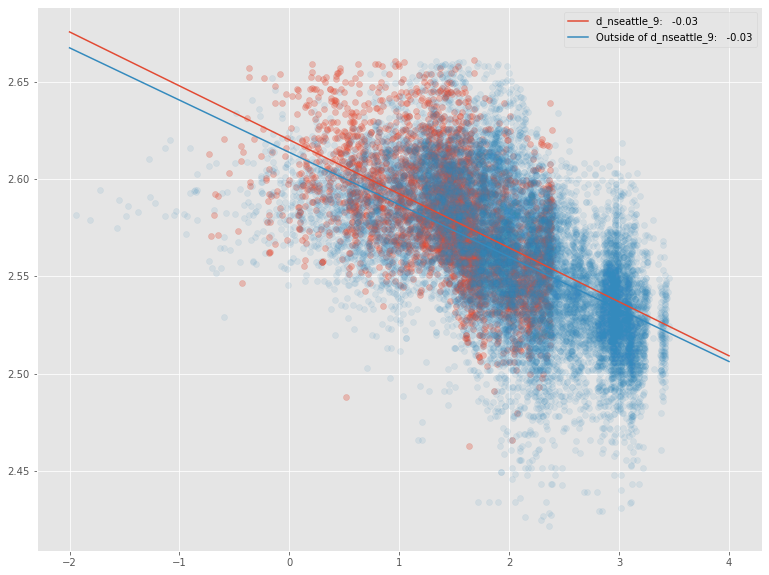

In [244]:
# Visualization code here
fig, ax = plt.subplots(figsize=(13, 10))

col = 'distance'
is_in = hddf_9.loc[hddf_9['d_nseattle_9'] == 1, [col, 'log_price']]
linreg = LinearRegression()
linreg.fit(np.log(is_in[[col]]), np.log(is_in['log_price']))
preds = linreg.predict(np.log(is_in[[col]]))
ax.scatter(np.log(is_in[[col]]), np.log(is_in['log_price']), alpha=.3, label=None)
x = np.linspace(-2, 4)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'd_nseattle_9:   {linreg.coef_[0]:.2f}')

not_in = hddf_9.loc[hddf_9['d_nseattle_9'] == 0, [col, 'log_price']]
linreg = LinearRegression()
linreg.fit(np.log(not_in[[col]]), np.log(not_in['log_price']))
preds = linreg.predict(np.log(not_in[[col]]))
ax.scatter(np.log(not_in[[col]]), np.log(not_in['log_price']), alpha=.1, label=None)

ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Outside of d_nseattle_9:   {linreg.coef_[0]:.2f}')

ax.legend()

## Build a final model with interactions

Use 10-fold cross-validation to build a model using the above interaction. 

In [245]:
# code here
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
final = X.copy()

final['distance*d_nseattle_9'] = final['distance'] * final['d_nseattle_9']

final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

final_model

0.8026853836950311

In [246]:
final.head()

,bedrooms,bathrooms,age,view_1,view_2,log_sqft_living,log_sqft_lot15,distance,grade_6_8,grade_8_13,d_anerural_1,d_bellvue_7,d_dtseattle_10,d_mercer_6,d_nseattle_9,d_redmond_8,d_renton_5,d_serural_2,d_vi_4,distance*d_nseattle_9
0,3,1.00,60,0,0,7.073270,8.639411,8.546605,1,0,0,0,0,0,0,0,1,0,0,0.000000
1,3,2.25,64,0,0,7.851661,8.941022,6.853555,1,0,0,0,0,0,1,0,0,0,0,6.853555
2,2,1.00,82,0,0,6.646391,8.994917,7.971782,1,0,0,0,0,0,0,1,0,0,0,0.000000
3,4,3.00,50,0,0,7.580700,8.517193,7.500724,1,0,0,0,1,0,0,0,0,0,0,0.000000
4,3,2.00,28,0,0,7.426549,8.923058,1.716678,0,1,1,0,0,0,0,0,0,0,0,0.000000


In [247]:
# code here
final['log_price'] = hddf_9['log_price']
outcome = 'log_price'
predictors = final.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [248]:
model_10 = ols(formula = formula, data = final).fit()
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     3961.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):               0.00
Time:                        02:55:12   Log-Likelihood:                 3137.8
No. Observations:               19414   AIC:                            -6234.
Df Residuals:                   19393   BIC:                            -6068.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.1479      0.048    168.606      0.000       8.053       8.243
bedrooms                 -0.0251      0.002    -10.734      0.000      -0.030      -0.020
bathrooms                 0.0435      0.004     11.783      0.000       0.036       0.051
age                       0.0007   7.66e-05      9.282      0.000       0.001       0.001
view_1                    0.1613      0.012     13.032      0.000       0.137       0.186
view_2                    0.1381      0.008     17.901      0.000       0.123       0.153
log_sqft_living           0.5483      0.007     76.040      0.000       0.534       0.562
log_sqft_lot15            0.0588      0.003     19.897      0.000       0.053       0.065
distance                 -0.0230      0.001    -41.597      0.000      -0.024      -0.022
grade_6_8                 0.0941      0.014      6.507      0.000       0.066       0.122
grade_8_13                0.2345      0.015     15.416      0.000       0.205       0.264
d_anerural_1              0.2012      0.010     19.993      0.000       0.182       0.221
d_bellvue_7               0.3935      0.012     33.895      0.000       0.371       0.416
d_dtseattle_10            0.2082      0.011     19.806      0.000       0.188       0.229
d_mercer_6                0.6207      0.017     36.811      0.000       0.588       0.654
d_nseattle_9              0.6683      0.015     46.031      0.000       0.640       0.697
d_redmond_8               0.2488      0.010     24.859      0.000       0.229       0.268
d_renton_5               -0.0432      0.008     -5.113      0.000      -0.060      -0.027
d_serural_2               0.0921      0.006     14.858      0.000       0.080       0.104
d_vi_4                    0.1804      0.031      5.812      0.000       0.120       0.241
distance:d_nseattle_9    -0.0539      0.001    -37.521      0.000      -0.057      -0.051
==============================================================================
Omnibus:                      799.827   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2315.372
Skew:                          -0.149   Prob(JB):                         0.00
Kurtosis:                       4.665   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [249]:
X = final.drop("log_price", axis = 1)
y = final['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [250]:
model_10_linreg = LinearRegression()
model_10_linreg.fit(X_train, y_train)
y_pred = model_10_linreg.predict(X_test)
residuals = y_pred - y_test

In [251]:
model_10_linreg.coef_

array([-0.02722363,  0.04637777,  0.00074775,  0.14952887,  0.13703141,
        0.54902297,  0.06060631, -0.02257943,  0.09696137,  0.2341256 ,
        0.20976453,  0.40560228,  0.21335096,  0.62208309,  0.67828833,
        0.25678864, -0.04204509,  0.09428725,  0.18774062, -0.05456986])

In [252]:
mse_train = mean_squared_error(y_train, model_10_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.20711188808730613
Test RMSE: 0.20218445354340578


In [253]:
np.sqrt(model_10.scale)

0.20597021941758684

In [254]:
mse_train = mean_squared_error(np.exp(y_train), np.exp(model_10_linreg.predict(X_train)))
mse_test = mean_squared_error(np.exp(y_test), np.exp(y_pred))

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 112742.0447931623
Test RMSE: 111200.88317938473


In [255]:
model_10.params

Intercept                8.147858
bedrooms                -0.025074
bathrooms                0.043535
age                      0.000711
view_1                   0.161327
view_2                   0.138131
log_sqft_living          0.548327
log_sqft_lot15           0.058759
distance                -0.023028
grade_6_8                0.094107
grade_8_13               0.234535
d_anerural_1             0.201242
d_bellvue_7              0.393494
d_dtseattle_10           0.208234
d_mercer_6               0.620723
d_nseattle_9             0.668327
d_redmond_8              0.248800
d_renton_5              -0.043234
d_serural_2              0.092105
d_vi_4                   0.180416
distance:d_nseattle_9   -0.053882
dtype: float64

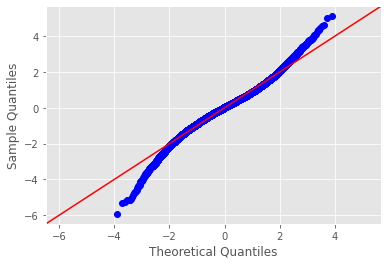

In [256]:
fig = sm.graphics.qqplot(model_10.resid, dist=stats.norm, line='45', fit=True)


--- 
--- 
--- 

Investigate why bedrooms is a negative correlation


In [257]:
final.head()

,bedrooms,bathrooms,age,view_1,view_2,log_sqft_living,log_sqft_lot15,distance,grade_6_8,grade_8_13,...,d_bellvue_7,d_dtseattle_10,d_mercer_6,d_nseattle_9,d_redmond_8,d_renton_5,d_serural_2,d_vi_4,distance*d_nseattle_9,log_price
0,3,1.00,60,0,0,7.073270,8.639411,8.546605,1,0,...,0,0,0,0,0,1,0,0,0.000000,12.309982
1,3,2.25,64,0,0,7.851661,8.941022,6.853555,1,0,...,0,0,0,1,0,0,0,0,6.853555,13.195614
2,2,1.00,82,0,0,6.646391,8.994917,7.971782,1,0,...,0,0,0,0,1,0,0,0,0.000000,12.100712
3,4,3.00,50,0,0,7.580700,8.517193,7.500724,1,0,...,0,1,0,0,0,0,0,0,0.000000,13.311329
4,3,2.00,28,0,0,7.426549,8.923058,1.716678,0,1,...,0,0,0,0,0,0,0,0,0.000000,13.142166


In [258]:
final.columns


Index(['bedrooms', 'bathrooms', 'age', 'view_1', 'view_2', 'log_sqft_living',
       'log_sqft_lot15', 'distance', 'grade_6_8', 'grade_8_13', 'd_anerural_1',
       'd_bellvue_7', 'd_dtseattle_10', 'd_mercer_6', 'd_nseattle_9',
       'd_redmond_8', 'd_renton_5', 'd_serural_2', 'd_vi_4',
       'distance*d_nseattle_9', 'log_price'],
      dtype='object')

In [259]:
final['bedrooms'].value_counts()

3    9108
4    6100
2    2583
5    1280
6     189
1     154
Name: bedrooms, dtype: int64

In [260]:
final['distance'].describe()

count    19414.000000
mean         8.975723
std          6.468720
min          0.144005
25%          4.256431
50%          6.855100
75%         11.565158
max         31.753260
Name: distance, dtype: float64

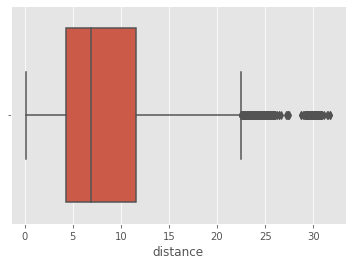

In [261]:
sns.boxplot(x=final['distance']);

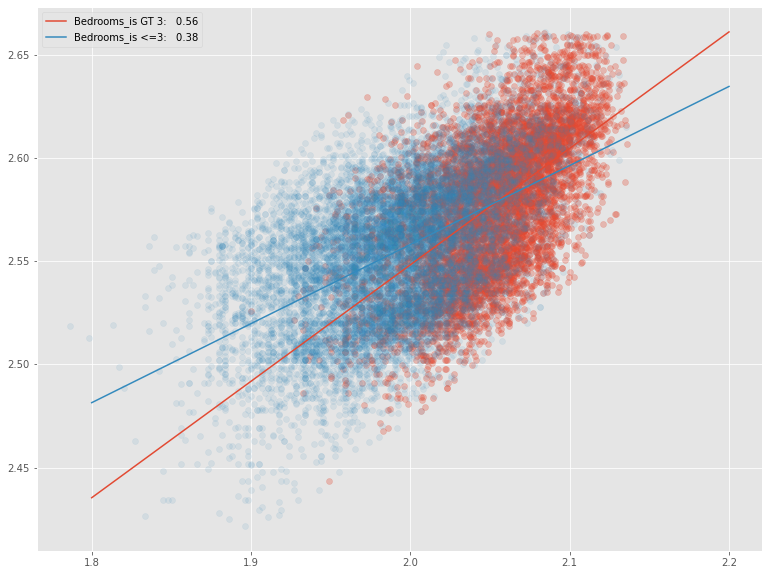

In [263]:
# Visualization code here
fig, ax = plt.subplots(figsize=(13, 10))

col = 'log_sqft_living'
x = np.linspace(1.8, 2.2)
linreg = LinearRegression()

is_in = hddf_9.loc[hddf_9['bedrooms'] > 3, [col, 'log_price']]

linreg.fit(np.log(is_in[[col]]), np.log(is_in['log_price']))
preds = linreg.predict(np.log(is_in[[col]]))
ax.scatter(np.log(is_in[[col]]), np.log(is_in['log_price']), alpha=.3, label=None)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Bedrooms_is GT 3:   {linreg.coef_[0]:.2f}')


not_in = hddf_9.loc[hddf_9['bedrooms'] <= 3 , [col, 'log_price']]
linreg.fit(np.log(not_in[[col]]), np.log(not_in['log_price']))
preds = linreg.predict(np.log(not_in[[col]]))
ax.scatter(np.log(not_in[[col]]), np.log(not_in['log_price']), alpha=.1, label=None)
ax.plot(x, linreg.predict(x.reshape(-1, 1)), label=f'Bedrooms_is <=3:   {linreg.coef_[0]:.2f}')


ax.legend()

# Interpret

In [264]:
#Table of models

In [265]:
models = ['baseline_model']
for i in range(2,11):
    models.append( 'model_'+str(i))
    
for myobject in models:
    # add myobject to list called locus
    # e.g. if locus == "A", add to list "A", if locus == "B" add to list B etc.
    obj = eval(myobject)
    print('Model {} = {}'.format(myobject, obj.rsquared))


Model baseline_model = 0.6999772105973672
Model model_2 = 0.67938473199336
Model model_3 = 0.6866934704241491
Model model_4 = 0.7352428407389584
Model model_5 = 0.7356419838261794
Model model_6 = 0.7739465509194348
Model model_7 = 0.8579623436702708
Model model_8 = 0.7890862312622597
Model model_9 = 0.7890862312622597
Model model_10 = 0.8033609842873082


In [266]:
final.columns


Index(['bedrooms', 'bathrooms', 'age', 'view_1', 'view_2', 'log_sqft_living',
       'log_sqft_lot15', 'distance', 'grade_6_8', 'grade_8_13', 'd_anerural_1',
       'd_bellvue_7', 'd_dtseattle_10', 'd_mercer_6', 'd_nseattle_9',
       'd_redmond_8', 'd_renton_5', 'd_serural_2', 'd_vi_4',
       'distance*d_nseattle_9', 'log_price'],
      dtype='object')

We performed a multiple linear regression in iterative manner in order to determiine significant factors of determining sales price of homes in King's County, WA.  A significant model was found to explain 80% of the variance in the data we analzed of the 19000+ rows of home sales data.  

$ log(price) = 8.1479 - 0.027 * (bedrooms) + 0.0464 * (bathrooms)
             + 0.0007 * (age)              + 0.1495 * (view_1)
             + 0.1371 * (view_2)           + 0.5490 * log(sqft_living)
             + 0.0606 * log(sqft_living15)
             - 0.0226 * (distance)         + 0.0970 * (grade_6_8) 
             + 0.2341 * (grade_8_13) 
             + 0.2098 * (d_anerural_1)     + 0.4056 * (d_bellvue_7)
             + 0.2134 * (d_dtseattle_10)   + 0.6221 * (d_mercer_6)
             + 0.6783 * (d_nseattle_9)     + 0.2568 * (d_redmond_8)
             - 0.0420 * (d_renton_5) 
             + 0.0940 * (d_serural_2)      +  0.1877 * (**d_vi_4**)
             - 0.0546 * (distance * d_nseattle_9) $ 

Where view_1 and view_2 is a rating of view from the home<br>
Distance is the distance from minimum distance from one of the 4 major employers<br>
grade_6_8 and grade_8_13 is a condition of the home on the Kings County grading system<br>
and the district information of the home<br>
Interesting to not we found an interaction between the distance of a home<br> from a major economic center and the existance of a home in the n seattle district.


Example B: Outcome transformed

log(DV) = Intercept + B1 * IV + Error 
"One unit increase in IV is associated with a (B1 * 100) percent increase in DV."

Example D: Outcome transformed and exposure transformed

log(DV) = Intercept + B1 * log(IV) + Error 
"One percent increase in IV is associated with a (B1) percent increase in DV."

The most significant factors in the model are the existance of the home<br>
in the **n_seattle_district** where a existance is an increase by 67% increase in price as compared to a home in the fedway district<br>
or existance of home on **mercer island** is a 62% in price<br>
and a house in very good condition, <br>or improving a home to grade_8_13, increase the outcome by 23% in price
or improving a home to grade_6_8, increase the outcome by 9.6% in price.

and a one percent increase in sqft_living is associated with a .55% increase in price. ex.   

---
---
---

For example, lets look at all of the sales data for homes in the N Seattle district
whose grade level is poor, not in grade 6-8 or not in grade 8-13.  
This lets us focus on 21 distinct properties.  We can use out model to predict 
the price outcome for these(stored in bad condition data frame).  Now lets set 
the grade for these homes to grade_8-13, ie what if we remodeled the property and improved the rating.
We can compare the results of price for both.  This lets us see an average precidted price of 80712 and std 15785, min 45396, max 125719 of the 21 properties wth an average age of 84 years.  This is a business opportunity assuming we could renovate the houses for less than the potential increase in price.

In [267]:
bad_condition_df = final.loc[(final["grade_6_8"] == 0) & (final["grade_8_13"] == 0) & (final['d_nseattle_9'] == 1)]

In [268]:
bad_condition_df

,bedrooms,bathrooms,age,view_1,view_2,log_sqft_living,log_sqft_lot15,distance,grade_6_8,grade_8_13,...,d_bellvue_7,d_dtseattle_10,d_mercer_6,d_nseattle_9,d_redmond_8,d_renton_5,d_serural_2,d_vi_4,distance*d_nseattle_9,log_price
1228,1,1.00,76,0,0,6.461468,8.756210,5.287415,0,0,...,0,0,0,1,0,0,0,0,5.287415,12.539684
1825,2,1.50,109,0,0,6.917706,8.342840,4.302296,0,0,...,0,0,0,1,0,0,0,0,4.302296,12.994530
2969,2,1.00,67,0,0,6.620073,8.389360,5.048688,0,0,...,0,0,0,1,0,0,0,0,5.048688,12.598115
4169,2,1.00,91,0,0,6.646391,8.525161,5.223570,0,0,...,0,0,0,1,0,0,0,0,5.223570,12.932413
5012,2,1.00,66,0,0,6.709304,8.881836,6.371219,0,0,...,0,0,0,1,0,0,0,0,6.371219,13.142166
5013,2,1.00,66,0,0,6.709304,8.881836,6.371219,0,0,...,0,0,0,1,0,0,0,0,6.371219,13.102059
5269,1,1.00,97,0,0,6.413459,8.517193,4.940226,0,0,...,0,0,0,1,0,0,0,0,4.940226,12.657785
6290,2,1.00,114,0,0,6.522093,8.536996,4.434764,0,0,...,0,0,0,1,0,0,0,0,4.434764,12.807653
7904,1,1.00,70,0,0,6.593045,8.642415,5.445088,0,0,...,0,0,0,1,0,0,0,0,5.445088,12.634440
8027,3,1.75,88,0,0,7.047517,9.032051,5.488547,0,0,...,0,0,0,1,0,0,0,0,5.488547,12.560244


In [269]:
goodcond = bad_condition_df.replace({'grade_8_13': {0: 1}}) 

In [270]:
goodcond

,bedrooms,bathrooms,age,view_1,view_2,log_sqft_living,log_sqft_lot15,distance,grade_6_8,grade_8_13,...,d_bellvue_7,d_dtseattle_10,d_mercer_6,d_nseattle_9,d_redmond_8,d_renton_5,d_serural_2,d_vi_4,distance*d_nseattle_9,log_price
1228,1,1.00,76,0,0,6.461468,8.756210,5.287415,0,1,...,0,0,0,1,0,0,0,0,5.287415,12.539684
1825,2,1.50,109,0,0,6.917706,8.342840,4.302296,0,1,...,0,0,0,1,0,0,0,0,4.302296,12.994530
2969,2,1.00,67,0,0,6.620073,8.389360,5.048688,0,1,...,0,0,0,1,0,0,0,0,5.048688,12.598115
4169,2,1.00,91,0,0,6.646391,8.525161,5.223570,0,1,...,0,0,0,1,0,0,0,0,5.223570,12.932413
5012,2,1.00,66,0,0,6.709304,8.881836,6.371219,0,1,...,0,0,0,1,0,0,0,0,6.371219,13.142166
5013,2,1.00,66,0,0,6.709304,8.881836,6.371219,0,1,...,0,0,0,1,0,0,0,0,6.371219,13.102059
5269,1,1.00,97,0,0,6.413459,8.517193,4.940226,0,1,...,0,0,0,1,0,0,0,0,4.940226,12.657785
6290,2,1.00,114,0,0,6.522093,8.536996,4.434764,0,1,...,0,0,0,1,0,0,0,0,4.434764,12.807653
7904,1,1.00,70,0,0,6.593045,8.642415,5.445088,0,1,...,0,0,0,1,0,0,0,0,5.445088,12.634440
8027,3,1.75,88,0,0,7.047517,9.032051,5.488547,0,1,...,0,0,0,1,0,0,0,0,5.488547,12.560244


In [271]:
np.exp(12.539684)

279200.097756214

In [272]:
y_pred = model_10_linreg.predict(bad_condition_df.drop("log_price", axis = 1))
y_pred2 = model_10_linreg.predict(goodcond.drop("log_price", axis = 1))

In [278]:
compare = goodcond

In [280]:
compare['age'].mean()

83.92307692307692

In [281]:
(np.exp(y_pred2) -np.exp(y_pred)).max()

125719.32135627873

In [282]:
compare['y_pred2']=y_pred2

In [283]:
compare['y_pred']=y_pred

In [284]:
compare['pricediff']=(np.exp(y_pred2) -np.exp(y_pred))

In [285]:
np.exp(compare['y_pred']).mean()

305957.7047786023

In [286]:
np.exp(y_pred2).mean()

386670.3306342849

In [287]:
compare

,bedrooms,bathrooms,age,view_1,view_2,log_sqft_living,log_sqft_lot15,distance,grade_6_8,grade_8_13,...,d_nseattle_9,d_redmond_8,d_renton_5,d_serural_2,d_vi_4,distance*d_nseattle_9,log_price,y_pred2,y_pred,pricediff
1228,1,1.00,76,0,0,6.461468,8.756210,5.287415,0,1,...,1,0,0,0,0,5.287415,12.539684,12.773780,12.539654,73651.701199
1825,2,1.50,109,0,0,6.917706,8.342840,4.302296,0,1,...,1,0,0,0,0,4.302296,12.994530,13.095854,12.861729,101638.407348
2969,2,1.00,67,0,0,6.620073,8.389360,5.048688,0,1,...,1,0,0,0,0,5.048688,12.598115,12.823089,12.588963,77374.391688
4169,2,1.00,91,0,0,6.646391,8.525161,5.223570,0,1,...,1,0,0,0,0,5.223570,12.932413,12.850222,12.616096,79502.548825
5012,2,1.00,66,0,0,6.709304,8.881836,6.371219,0,1,...,1,0,0,0,0,6.371219,13.142166,12.799146,12.565020,75543.823575
5013,2,1.00,66,0,0,6.709304,8.881836,6.371219,0,1,...,1,0,0,0,0,6.371219,13.102059,12.799146,12.565020,75543.823575
5269,1,1.00,97,0,0,6.413459,8.517193,4.940226,0,1,...,1,0,0,0,0,4.940226,12.657785,12.775424,12.541298,73772.889988
6290,2,1.00,114,0,0,6.522093,8.536996,4.434764,0,1,...,1,0,0,0,0,4.434764,12.807653,12.860751,12.626625,80344.056859
7904,1,1.00,70,0,0,6.593045,8.642415,5.445088,0,1,...,1,0,0,0,0,5.445088,12.634440,12.822471,12.588345,77326.612810
8027,3,1.75,88,0,0,7.047517,9.032051,5.488547,0,1,...,1,0,0,0,0,5.488547,12.560244,13.086044,12.851918,100646.184575


For example a home in the N seattle district which is in poorer condition
could be brought up to a grade 8 to 13 condition increase in value has an average price increase of
80712.00 and std 15785 min 45396 max 125719

In [288]:
y_pred = model_10_linreg.predict(X_test)
residuals = y_pred - y_test

In [289]:
y_pred

array([12.95923155, 12.99047516, 12.81546524, ..., 13.20680706,
       12.6149724 , 12.28754129])

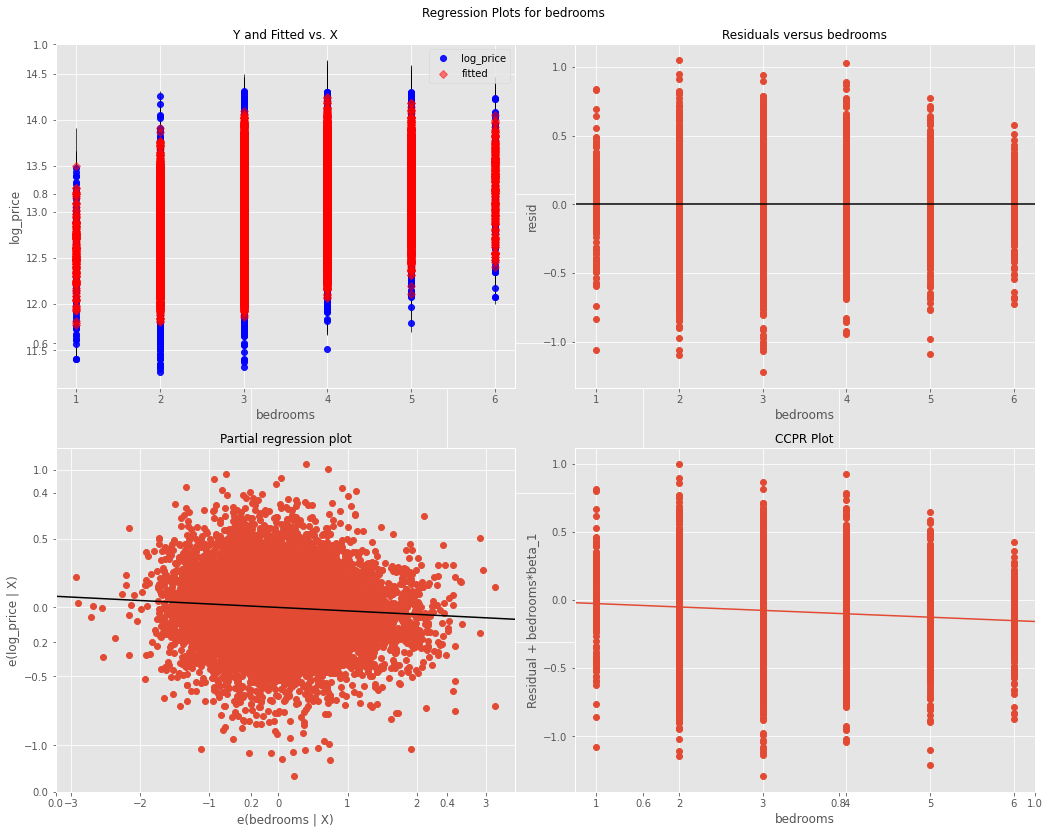

In [291]:
fig, axes = plt.subplots(figsize=(15,12))
fig = sm.graphics.plot_regress_exog(model_10, column, fig=fig)
fig.tight_layout()
plt.show()

In [292]:
results = []
for idx, column in enumerate(data.columns):
    print (f"Kings County DataSet - Regression Analysis and Diagnostics for SalePrice~{column}")
    print ("-------------------------------------------------------------------------------------")

    f = f'SalePrice~{column}'
    model = smf.ols(formula=f, data=data).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

Kings County DataSet - Regression Analysis and Diagnostics for SalePrice~bedrooms
-------------------------------------------------------------------------------------


NameError: name 'smf' is not defined